<div style="display: flex; background-color: RGB(150,160,150);" >
<h1 style="margin: auto; padding: 30px; ">Analyse Des Groupements De Pays Pour Exportation des Poulets de La Poule Qui Chante 
</h1>
</div>

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
pd.options.mode.copy_on_write = True

In [2]:
#Importation de la librairie plotly express (visualisation des données)
import plotly.express as px

In [3]:
#Importation de la librairie matplotlib (visualisation des données)
import matplotlib.pyplot as plt

In [4]:
#Importation de la librairie numpy  (manipulation des tableaux et l'algèbre linéaire)
import numpy as np

In [5]:
#Importation de la librairie seaborn  (visualisation des données)
import seaborn as sns

In [6]:
#Importation de la librairie seaborn  (analyses statistiques)
import scipy.stats as stats

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [7]:
#Importation du fichier FAOSTAT_data_fr_population
df_population = pd.read_csv("FAOSTAT_data_fr_population.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_PrixProduction.csv
df_prixProduction = pd.read_csv("FAOSTAT_data_fr_PrixProduction.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_ImportExportPoulet.csv
df_importExportPoulet = pd.read_csv("FAOSTAT_data_fr_ImportExportPoulet.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_ImportExport.csv
df_importExport = pd.read_csv("FAOSTAT_data_fr_ImportExport.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_disponibilité.csv
df_dispoAlimentaire = pd.read_csv("FAOSTAT_data_fr_disponibilité.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_AgricultureBIO.csv
df_agricultureBIO = pd.read_csv("FAOSTAT_data_fr_AgricultureBIO.csv", sep=',')

#Importation du fichier FAOSTAT_data_fr_tauxDeChange.csv
df_tauxDeChange = pd.read_csv("FAOSTAT_data_fr_tauxDeChange.csv", sep=',')

#Importation du fichier WBG_data_fr.csv
df_WBG = pd.read_csv("WBG_data_fr.csv", sep=',', encoding='latin-1')

#Importation du fichier WBG_ImportScore.csv
df_WBG_ImportScore = pd.read_csv("WBG_ImportScore.csv", sep=',', encoding='latin-1')

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.1 - Analyse exploratoire du fichier FAOSTAT_data_fr_disponibilité.csv</h3>
</div>

In [8]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_dispoAlimentaire.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_dispoAlimentaire.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_dispoAlimentaire.shape[1]))

Dimensions du dataset df_customer: (6238, 7)
Le tableau comporte 6238 lignes
Le tableau comporte 7 colonnes


In [9]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_dispoAlimentaire.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_dispoAlimentaire.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_dispoAlimentaire.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    6238
Zone       6238
Élément    6238
Produit    6238
Année      6238
Unité      6238
Valeur     6238
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine       1
Zone        190
Élément       7
Produit       1
Année         5
Unité         2
Valeur     4953
dtype: int64



In [10]:
#Affiche les 5 premières lignes de la table
df_dispoAlimentaire.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Compte Disponibilités et Utilisations (CDU) (2...,Afghanistan,Stocks d'ouverture,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,0.00
1,Compte Disponibilités et Utilisations (CDU) (2...,Afghanistan,Production,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,29073.16
2,Compte Disponibilités et Utilisations (CDU) (2...,Afghanistan,Importations - quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,23913.00
3,Compte Disponibilités et Utilisations (CDU) (2...,Afghanistan,Variation de stock,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,0.00
4,Compte Disponibilités et Utilisations (CDU) (2...,Afghanistan,Exportations - quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,154.00


In [11]:
df_dispoAlimentaire["Élément"].unique()

array(["Stocks d'ouverture", 'Production', 'Importations - quantité',
       'Variation de stock', 'Exportations - quantité',
       'Disponibilité alimentaire en quantité (tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)'], dtype=object)

In [12]:
df_dispoAlimentaire = df_dispoAlimentaire[["Zone","Élément","Produit","Année","Valeur","Unité"]]

In [13]:
df_dispoAlimentaire.head()

,Zone,Élément,Produit,Année,Valeur,Unité
0,Afghanistan,Stocks d'ouverture,"Viande, poulet, fraîche ou réfrigérée",2018,0.00,tonnes
1,Afghanistan,Production,"Viande, poulet, fraîche ou réfrigérée",2018,29073.16,tonnes
2,Afghanistan,Importations - quantité,"Viande, poulet, fraîche ou réfrigérée",2018,23913.00,tonnes
3,Afghanistan,Variation de stock,"Viande, poulet, fraîche ou réfrigérée",2018,0.00,tonnes
4,Afghanistan,Exportations - quantité,"Viande, poulet, fraîche ou réfrigérée",2018,154.00,tonnes


In [14]:
df_dispoAlimentaire = df_dispoAlimentaire.pivot(index=["Zone", "Produit","Année"], columns="Élément", values="Valeur").reset_index()


In [15]:
df_dispoAlimentaire.head()

Élément,Zone,Produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Exportations - quantité,Importations - quantité,Production,Stocks d'ouverture,Variation de stock
0,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2018,5.44,52832.16,154.00,23913.00,29073.16,0.00,0.00
1,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2019,6.77,67725.12,NaN,42875.43,28032.76,0.00,3183.07
2,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2020,6.14,63370.79,0.24,35617.07,27753.95,3183.07,0.00
3,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2021,5.66,60165.64,13.81,32613.38,28480.02,3183.07,913.96
4,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2022,3.23,35158.97,NaN,6902.31,28790.74,4097.03,534.09


In [16]:
df_dispoAlimentaire.isna().sum()

Élément
Zone                                                0
Produit                                             0
Année                                               0
Disponibilité alimentaire (Kcal/personne/jour)      0
Disponibilité alimentaire en quantité (tonnes)      0
Exportations - quantité                           285
Importations - quantité                            22
Production                                         14
Stocks d'ouverture                                  0
Variation de stock                                  0
dtype: int64

In [17]:
df_dispoAlimentaire_isna = df_dispoAlimentaire[df_dispoAlimentaire.isna().any(axis=1)]

In [18]:
df_dispoAlimentaire_isna.describe()

Élément,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Exportations - quantité,Importations - quantité,Production,Stocks d'ouverture,Variation de stock
count,299.000000,299.000000,2.990000e+02,14.000000,277.000000,2.850000e+02,299.000000,299.000000
mean,2020.030100,75.048997,1.122486e+05,2944.902857,30293.171119,9.063064e+04,19337.560903,447.994916
std,1.403171,81.244401,3.923157e+05,5391.242450,91642.555915,3.309536e+05,63151.147740,3080.575304
min,2018.000000,1.490000,4.690400e+02,0.010000,0.030000,3.000000e-02,0.000000,-19706.160000
25%,2019.000000,13.075000,6.798910e+03,7.097500,1902.420000,8.659700e+02,358.800000,0.000000
50%,2020.000000,39.460000,2.562323e+04,84.435000,5232.840000,8.346360e+03,3257.320000,0.000000
75%,2021.000000,120.955000,7.720801e+04,4331.965000,21929.500000,5.374535e+04,13896.400000,0.000000
max,2022.000000,440.040000,4.459828e+06,17642.460000,970362.170000,3.578694e+06,694338.600000,22677.940000


In [19]:
df_dispoAlimentaire_isna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 936
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            299 non-null    object 
 1   Produit                                         299 non-null    object 
 2   Année                                           299 non-null    int64  
 3   Disponibilité alimentaire (Kcal/personne/jour)  299 non-null    float64
 4   Disponibilité alimentaire en quantité (tonnes)  299 non-null    float64
 5   Exportations - quantité                         14 non-null     float64
 6   Importations - quantité                         277 non-null    float64
 7   Production                                      285 non-null    float64
 8   Stocks d'ouverture                              299 non-null    float64
 9   Variation de stock                         

In [20]:
df_dispoAlimentaire_isna["Zone"].unique()

array(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie',
       'Bahamas', 'Bangladesh', 'Belize', 'Bhoutan', 'Botswana',
       'Burkina Faso', 'Burundi', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Chine - RAS de Macao', 'Colombie', 'Comores', 'Congo',
       'Cuba', 'Djibouti', 'Dominique', 'Gabon', 'Gambie', 'Ghana',
       'Grenade', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Haïti', 'Israël',
       'Kirghizistan', 'Kiribati', 'Lesotho', 'Libye', 'Libéria',
       'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maurice',
       'Mauritanie', 'Mexique', 'Micronésie (États fédérés de)',
       'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar', 'Nauru',
       'Niger', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Népal',
       'Ouzbékistan', 'Panama', 'Papouasie-Nouvelle-Guinée', 'Paraguay',
       'Polynésie française', 'Qatar', 'République arabe syrienne',
       'République centrafricaine', 'République démocratique du Congo',
       'République démocratique populaire la

In [21]:
df_dispoAlimentaire["Zone"].nunique()

190

In [22]:
df_dispoAlimentaire[df_dispoAlimentaire["Année"] == 2022].isna().mean()

Élément
Zone                                              0.000000
Produit                                           0.000000
Année                                             0.000000
Disponibilité alimentaire (Kcal/personne/jour)    0.000000
Disponibilité alimentaire en quantité (tonnes)    0.000000
Exportations - quantité                           0.301587
Importations - quantité                           0.026455
Production                                        0.015873
Stocks d'ouverture                                0.000000
Variation de stock                                0.000000
dtype: float64

In [23]:
df_dispoAlimentaire[df_dispoAlimentaire["Année"] == 2022].shape

(189, 10)

In [24]:
df_dispoAlimentaire[df_dispoAlimentaire["Importations - quantité"].isna()]["Zone"].unique()

array(['Algérie', 'Israël', 'Madagascar', 'Myanmar', 'Nouvelle-Zélande',
       'Népal', 'Paraguay', 'Tunisie', 'Équateur'], dtype=object)

In [25]:
df_dispoAlimentaire[df_dispoAlimentaire["Importations - quantité"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 19 to 917
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            22 non-null     object 
 1   Produit                                         22 non-null     object 
 2   Année                                           22 non-null     int64  
 3   Disponibilité alimentaire (Kcal/personne/jour)  22 non-null     float64
 4   Disponibilité alimentaire en quantité (tonnes)  22 non-null     float64
 5   Exportations - quantité                         11 non-null     float64
 6   Importations - quantité                         0 non-null      float64
 7   Production                                      22 non-null     float64
 8   Stocks d'ouverture                              22 non-null     float64
 9   Variation de stock                         

In [26]:
#df_dispoAlimentaire = df_dispoAlimentaire[~df_dispoAlimentaire["Importations - quantité"].isna()]

In [27]:
df_dispoAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            937 non-null    object 
 1   Produit                                         937 non-null    object 
 2   Année                                           937 non-null    int64  
 3   Disponibilité alimentaire (Kcal/personne/jour)  937 non-null    float64
 4   Disponibilité alimentaire en quantité (tonnes)  937 non-null    float64
 5   Exportations - quantité                         652 non-null    float64
 6   Importations - quantité                         915 non-null    float64
 7   Production                                      923 non-null    float64
 8   Stocks d'ouverture                              937 non-null    float64
 9   Variation de stock                         

In [28]:
df_dispoAlimentaire["Zone"].nunique()

190

In [29]:
df_dispoAlimentaire_2022 = df_dispoAlimentaire[df_dispoAlimentaire["Année"] == 2022]

In [30]:
# Compter les doublons
duplicate_rows = df_dispoAlimentaire_2022[df_dispoAlimentaire_2022["Zone"].duplicated()]
print(f"Nombre de doublons : {len(duplicate_rows)}")

Nombre de doublons : 0


In [31]:
# Vérification des types de données
print(df_dispoAlimentaire_2022.dtypes)

Élément
Zone                                               object
Produit                                            object
Année                                               int64
Disponibilité alimentaire (Kcal/personne/jour)    float64
Disponibilité alimentaire en quantité (tonnes)    float64
Exportations - quantité                           float64
Importations - quantité                           float64
Production                                        float64
Stocks d'ouverture                                float64
Variation de stock                                float64
dtype: object


In [32]:
# Vérifier les valeurs négatives
negative_values = df_dispoAlimentaire_2022[df_dispoAlimentaire_2022[['Disponibilité alimentaire (Kcal/personne/jour)',"Disponibilité alimentaire en quantité (tonnes)", "Exportations - quantité", "Importations - quantité", "Production","Stocks d'ouverture"]] < 0]
#print("Valeurs négatives détectées :\n", negative_values)

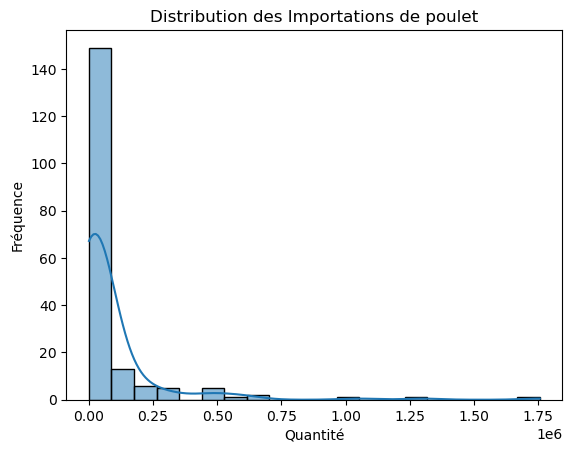

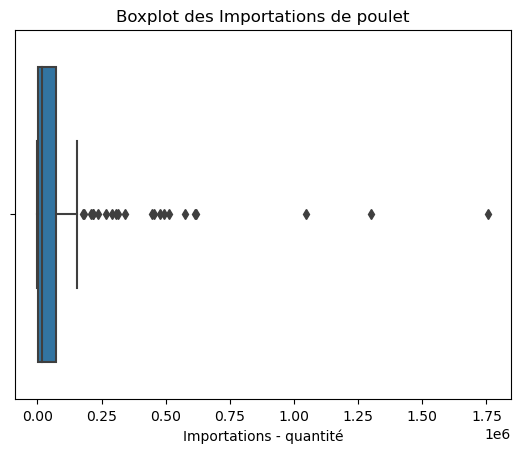

In [33]:
# Histogramme
sns.histplot(df_dispoAlimentaire_2022["Importations - quantité"], bins=20, kde=True)
plt.title("Distribution des Importations de poulet")
plt.xlabel("Quantité")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_dispoAlimentaire_2022["Importations - quantité"])
plt.title("Boxplot des Importations de poulet")
plt.show()

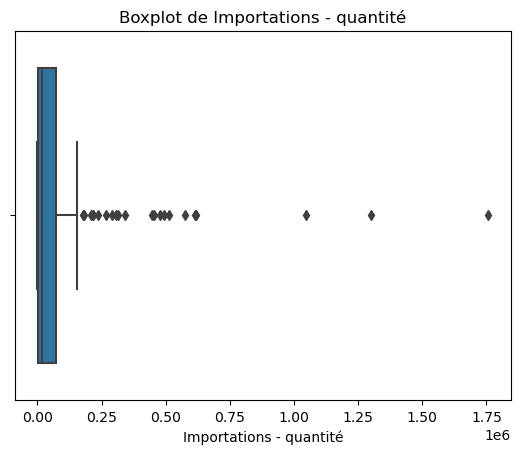

Valeurs aberrantes :
 Élément                                               Zone  \
9                                           Afrique du Sud   
24                                               Allemagne   
29                                                  Angola   
39                                         Arabie saoudite   
88                                                Belgique   
172                                                  Chine   
177                               Chine - RAS de Hong-Kong   
187                              Chine, Taiwan Province de   
192                                    Chine, continentale   
227                                                   Cuba   
282                                                 France   
302                                                  Ghana   
372                                                   Iraq   
402                                                  Japon   
482                                             

In [34]:
# Boxplot pour détecter les outliers
sns.boxplot(x=df_dispoAlimentaire_2022['Importations - quantité'])
plt.title("Boxplot de Importations - quantité")
plt.show()

# Résumé des valeurs aberrantes
q1 = df_dispoAlimentaire_2022['Importations - quantité'].quantile(0.25)
q3 = df_dispoAlimentaire_2022['Importations - quantité'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_dispoAlimentaire_2022[(df_dispoAlimentaire_2022['Importations - quantité'] < lower_bound) | (df_dispoAlimentaire_2022['Importations - quantité'] > upper_bound)]
print("Valeurs aberrantes :\n", outliers[["Zone", "Importations - quantité"]])

In [35]:
# Moyenne, médiane et écart-type
mean = df_dispoAlimentaire_2022['Importations - quantité'].mean()
median = df_dispoAlimentaire_2022['Importations - quantité'].median()
std = df_dispoAlimentaire_2022['Importations - quantité'].std()

print(f"Moyenne : {mean}")
print(f"Médiane : {median}")
print(f"Écart-type : {std}")

Moyenne : 86230.8064673913
Médiane : 16345.145
Écart-type : 206931.72878153776


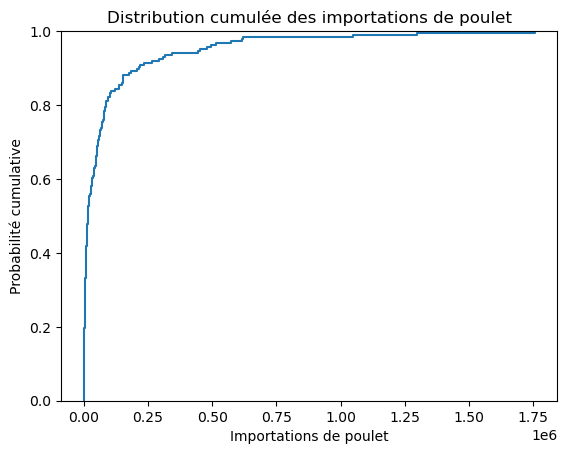

In [36]:
# Distribution cumulée
sns.ecdfplot(df_dispoAlimentaire_2022['Importations - quantité'])
plt.title("Distribution cumulée des importations de poulet")
plt.xlabel("Importations de poulet")
plt.ylabel("Probabilité cumulative")
plt.show()

In [37]:
df_dispoAlimentaire_2022.head()

Élément,Zone,Produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Exportations - quantité,Importations - quantité,Production,Stocks d'ouverture,Variation de stock
4,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2022,3.23,35158.97,NaN,6902.31,28790.74,4097.03,534.09
9,Afrique du Sud,"Viande, poulet, fraîche ou réfrigérée",2022,148.09,2350000.00,45821.28,290742.62,1951000.00,329905.08,-158756.90
14,Albanie,"Viande, poulet, fraîche ou réfrigérée",2022,78.96,59460.03,NaN,43124.46,16335.57,7762.60,0.00
19,Algérie,"Viande, poulet, fraîche ou réfrigérée",2022,23.10,274833.81,29.00,NaN,274862.81,0.00,0.00
24,Allemagne,"Viande, poulet, fraîche ou réfrigérée",2022,41.64,919780.73,323859.35,494001.70,1076000.00,1324037.70,166374.59


In [38]:
df_dispoAlimentaire_2022.shape

(189, 10)

In [39]:
df_dispoAlimentaire_2022.isna().sum()

Élément
Zone                                               0
Produit                                            0
Année                                              0
Disponibilité alimentaire (Kcal/personne/jour)     0
Disponibilité alimentaire en quantité (tonnes)     0
Exportations - quantité                           57
Importations - quantité                            5
Production                                         3
Stocks d'ouverture                                 0
Variation de stock                                 0
dtype: int64

In [40]:
df_dispoAlimentaire_2022.drop(columns=["Exportations - quantité","Année", "Importations - quantité", "Produit"], inplace=True)

In [41]:
df_dispoAlimentaire_2022[df_dispoAlimentaire_2022["Production"].isna()]

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Production,Stocks d'ouverture,Variation de stock
242,Djibouti,14.26,4235.19,NaN,358.80,0.00
492,Maldives,75.66,10500.00,NaN,0.00,0.00
931,Îles Marshall,268.31,2955.15,NaN,731.38,-148.08


In [42]:
df_dispoAlimentaire_2022 = df_dispoAlimentaire_2022[~df_dispoAlimentaire_2022["Production"].isna()]

In [43]:
df_dispoAlimentaire_2022.isna().sum()

Élément
Zone                                              0
Disponibilité alimentaire (Kcal/personne/jour)    0
Disponibilité alimentaire en quantité (tonnes)    0
Production                                        0
Stocks d'ouverture                                0
Variation de stock                                0
dtype: int64

In [44]:
df_dispoAlimentaire_2022 = df_dispoAlimentaire_2022.set_index('Zone')

In [45]:
df_dispoAlimentaire_2022.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Production,Stocks d'ouverture,Variation de stock
Zone,,,,,
Afghanistan,3.23,35158.97,28790.74,4097.03,534.09
Afrique du Sud,148.09,2350000.00,1951000.00,329905.08,-158756.90
Albanie,78.96,59460.03,16335.57,7762.60,0.00
Algérie,23.10,274833.81,274862.81,0.00,0.00
Allemagne,41.64,919780.73,1076000.00,1324037.70,166374.59


<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.2 - Analyse exploratoire du fichier FAOSTAT_data_fr_population.csv</h3>
</div>

In [46]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_population.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_population.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_population.shape[1]))

Dimensions du dataset df_customer: (940, 7)
Le tableau comporte 940 lignes
Le tableau comporte 7 colonnes


In [47]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_population.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_population.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_population.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    940
Zone       940
Élément    940
Produit    940
Année      940
Unité      940
Valeur     940
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine      1
Zone       235
Élément      1
Produit      1
Année        4
Unité        1
Valeur     939
dtype: int64



In [48]:
df_population.isna().mean()

Domaine    0.0
Zone       0.0
Élément    0.0
Produit    0.0
Année      0.0
Unité      0.0
Valeur     0.0
dtype: float64

In [49]:
df_population.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2018,1000 personnes,36686.784
1,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2019,1000 personnes,37769.499
2,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2020,1000 personnes,38972.230
3,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2021,1000 personnes,40099.462
4,Séries temporelles annuelles,Afrique du Sud,Population totale,Population-Estimations,2018,1000 personnes,57339.635


In [50]:
df_population = df_population[["Zone", "Année", "Valeur"]]

In [51]:
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2018,36686.784
1,Afghanistan,2019,37769.499
2,Afghanistan,2020,38972.230
3,Afghanistan,2021,40099.462
4,Afrique du Sud,2018,57339.635


In [52]:
df_population["Valeur"] = df_population["Valeur"]*1000

In [53]:
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2018,36686784.0
1,Afghanistan,2019,37769499.0
2,Afghanistan,2020,38972230.0
3,Afghanistan,2021,40099462.0
4,Afrique du Sud,2018,57339635.0


In [54]:
df_population.describe()

,Année,Valeur
count,940.000000,9.400000e+02
mean,2019.500000,3.937146e+07
std,1.118629,1.633469e+08
min,2018.000000,5.110000e+02
25%,2018.750000,4.075472e+05
50%,2019.500000,5.518499e+06
75%,2020.250000,2.172967e+07
max,2021.000000,1.457935e+09


In [55]:
df_population_2021 = df_population[df_population["Année"] == 2021]

In [56]:
df_population_2021.shape

(235, 3)

In [57]:
df_population_2021 = df_population_2021.set_index('Zone')

In [58]:
df_population_2021.isna().sum()

Année     0
Valeur    0
dtype: int64

In [59]:
df_population_2021.head()

,Année,Valeur
Zone,,
Afghanistan,2021,40099462.0
Afrique du Sud,2021,59392255.0
Albanie,2021,2854710.0
Algérie,2021,44177969.0
Allemagne,2021,83408554.0


In [60]:
df_population_2021 = df_population_2021.rename(columns={'Valeur': 'Population'})


In [61]:
df_population_2021.drop(columns=["Année"], inplace=True)

In [62]:
df_population_2021.head()

,Population
Zone,
Afghanistan,40099462.0
Afrique du Sud,59392255.0
Albanie,2854710.0
Algérie,44177969.0
Allemagne,83408554.0


<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.3 - Analyse exploratoire du fichier FAOSTAT_data_fr_PrixProduction.csv</h3>
</div>

In [63]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_prixProduction.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_prixProduction.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_prixProduction.shape[1]))

Dimensions du dataset df_customer: (615, 8)
Le tableau comporte 615 lignes
Le tableau comporte 8 colonnes


In [64]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_prixProduction.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_prixProduction.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_prixProduction.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Mois        object
Unité       object
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    615
Zone       615
Élément    615
Produit    615
Année      615
Mois       615
Unité      615
Valeur     615
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine      1
Zone        49
Élément      3
Produit      1
Année        5
Mois         1
Unité        3
Valeur     392
dtype: int64



In [65]:
df_prixProduction.head()

,Domaine,Zone,Élément,Produit,Année,Mois,Unité,Valeur
0,Prix à la Production,Afrique du Sud,Prix à la Production (LCU/tonne),"Viande, poulet, fraîche ou réfrigérée",2018,Valeur annuel,UML,27564.0
1,Prix à la Production,Afrique du Sud,Prix à la Production (LCU/tonne),"Viande, poulet, fraîche ou réfrigérée",2019,Valeur annuel,UML,25921.0
2,Prix à la Production,Afrique du Sud,Prix à la Production (LCU/tonne),"Viande, poulet, fraîche ou réfrigérée",2020,Valeur annuel,UML,26544.0
3,Prix à la Production,Afrique du Sud,Prix à la Production (LCU/tonne),"Viande, poulet, fraîche ou réfrigérée",2021,Valeur annuel,UML,26472.0
4,Prix à la Production,Afrique du Sud,Prix à la Production (LCU/tonne),"Viande, poulet, fraîche ou réfrigérée",2022,Valeur annuel,UML,30224.0


In [66]:
df_prixProduction.describe()

,Année,Valeur
count,615.000000,6.150000e+02
mean,2019.878049,1.971149e+06
std,1.411824,1.238435e+07
min,2018.000000,9.499000e+02
25%,2019.000000,2.076000e+03
50%,2020.000000,4.546500e+03
75%,2021.000000,2.936200e+04
max,2022.000000,1.003089e+08


In [67]:
df_prixProduction.isna().mean()

Domaine    0.0
Zone       0.0
Élément    0.0
Produit    0.0
Année      0.0
Mois       0.0
Unité      0.0
Valeur     0.0
dtype: float64

In [68]:
df_prixProduction = df_prixProduction.pivot(index=["Domaine", "Zone", "Produit","Année"], columns="Élément", values="Valeur").reset_index()


In [69]:
df_prixProduction_2022 = df_prixProduction[df_prixProduction["Année"] == 2022]

In [70]:
df_prixProduction_2019 = df_prixProduction[df_prixProduction["Année"] == 2017]

In [71]:
df_prixProduction_2019.shape

(0, 7)

In [72]:
df_prixProduction_2022.drop(columns=['Produit', 'Domaine', "Année"], inplace=True)


In [73]:
df_prixProduction_2022.head()

Élément,Zone,Prix à la Production (LCU/tonne),Prix à la Production (SLC/tonne),Prix à la Production (USD/tonne)
4,Afrique du Sud,30224.0,30224.0,1847.9
13,Allemagne,1696.0,1696.0,1786.0
17,Arabie saoudite,19544.4,19544.4,5211.9
25,Arménie,2704722.0,2704722.0,6208.2
28,Australie,2329.6,2329.6,1615.9


In [74]:
# Compter les doublons
duplicate_rows = df_prixProduction_2022[df_prixProduction_2022["Zone"].duplicated()]
print(f"Nombre de doublons : {len(duplicate_rows)}")

Nombre de doublons : 0


In [75]:
# Vérification des types de données
print(df_prixProduction_2022.dtypes)

Élément
Zone                                 object
Prix à la Production (LCU/tonne)    float64
Prix à la Production (SLC/tonne)    float64
Prix à la Production (USD/tonne)    float64
dtype: object


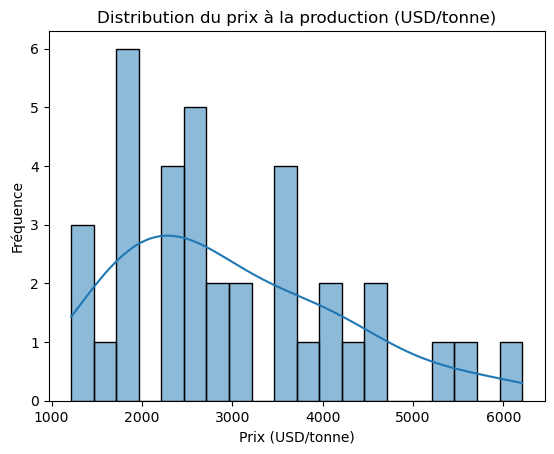

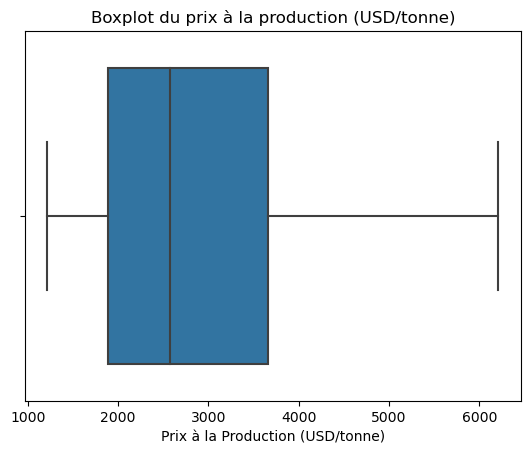

In [76]:
# Histogramme
sns.histplot(df_prixProduction_2022['Prix à la Production (USD/tonne)'], bins=20, kde=True)
plt.title("Distribution du prix à la production (USD/tonne)")
plt.xlabel("Prix (USD/tonne)")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_prixProduction_2022['Prix à la Production (USD/tonne)'])
plt.title("Boxplot du prix à la production (USD/tonne)")
plt.show()

In [77]:
# Résumé des valeurs aberrantes
q1 = df_prixProduction_2022['Prix à la Production (USD/tonne)'].quantile(0.25)
q3 = df_prixProduction_2022['Prix à la Production (USD/tonne)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_prixProduction_2022[(df_prixProduction_2022['Prix à la Production (USD/tonne)'] < lower_bound) | (df_prixProduction_2022['Prix à la Production (USD/tonne)'] > upper_bound)]
print("Valeurs aberrantes :\n", outliers)

Valeurs aberrantes :
 Empty DataFrame
Columns: [Zone, Prix à la Production (LCU/tonne), Prix à la Production (SLC/tonne), Prix à la Production (USD/tonne)]
Index: []


In [78]:
df_prixProduction_2022.head()

Élément,Zone,Prix à la Production (LCU/tonne),Prix à la Production (SLC/tonne),Prix à la Production (USD/tonne)
4,Afrique du Sud,30224.0,30224.0,1847.9
13,Allemagne,1696.0,1696.0,1786.0
17,Arabie saoudite,19544.4,19544.4,5211.9
25,Arménie,2704722.0,2704722.0,6208.2
28,Australie,2329.6,2329.6,1615.9


In [79]:
df_prixProduction_2022.isna().sum()

Élément
Zone                                0
Prix à la Production (LCU/tonne)    0
Prix à la Production (SLC/tonne)    0
Prix à la Production (USD/tonne)    0
dtype: int64

In [80]:
df_prixProduction_2022 = df_prixProduction_2022[["Zone", "Prix à la Production (USD/tonne)"]]

In [81]:
df_prixProduction_2022 = df_prixProduction_2022[~df_prixProduction_2022.isna().any(axis=1)]

In [82]:
df_prixProduction_2022 = df_prixProduction_2022.set_index('Zone')

In [83]:
df_prixProduction_2022.head()

Élément,Prix à la Production (USD/tonne)
Zone,
Afrique du Sud,1847.9
Allemagne,1786.0
Arabie saoudite,5211.9
Arménie,6208.2
Australie,1615.9


In [84]:
df_prixProduction_2022.shape

(36, 1)

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.4 - Analyse exploratoire du fichier FAOSTAT_data_fr_ImportExportPoulet.csv</h3>
</div>

In [85]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_importExportPoulet.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_importExportPoulet.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_importExportPoulet.shape[1]))

Dimensions du dataset df_customer: (1314, 8)
Le tableau comporte 1314 lignes
Le tableau comporte 8 colonnes


In [86]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_importExportPoulet.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_importExportPoulet.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_importExportPoulet.nunique()))

La nature des données dans chacune des colonnes:
Domaine              object
Pays déclarants      object
Pays partenaires     object
Élément              object
Produit              object
Année                 int64
Unité                object
Valeur              float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine             1314
Pays déclarants     1314
Pays partenaires    1314
Élément             1314
Produit             1314
Année               1314
Unité               1314
Valeur              1314
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine                1
Pays déclarants        1
Pays partenaires     130
Élément                4
Produit                1
Année                  5
Unité                  2
Valeur              1143
dtype: int64



In [87]:
df_importExportPoulet.head()

,Domaine,Pays déclarants,Pays partenaires,Élément,Produit,Année,Unité,Valeur
0,Matrices du commerce détaillées,France,Afrique du Sud,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,295.00
1,Matrices du commerce détaillées,France,Afrique du Sud,Exportations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2018,1000 US$,237.00
2,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,98.88
3,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2019,tonnes,157.60
4,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2020,tonnes,277.25


In [88]:
df_importExportPoulet.describe()

,Année,Valeur
count,1314.000000,1314.000000
mean,2019.964992,8872.685358
std,1.404050,35066.916496
min,2018.000000,0.000000
25%,2019.000000,55.392500
50%,2020.000000,313.050000
75%,2021.000000,2286.762500
max,2022.000000,479913.000000


In [89]:
df_importExportPoulet.isna().mean()

Domaine             0.0
Pays déclarants     0.0
Pays partenaires    0.0
Élément             0.0
Produit             0.0
Année               0.0
Unité               0.0
Valeur              0.0
dtype: float64

In [90]:
df_importExportPoulet.head()

,Domaine,Pays déclarants,Pays partenaires,Élément,Produit,Année,Unité,Valeur
0,Matrices du commerce détaillées,France,Afrique du Sud,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,295.00
1,Matrices du commerce détaillées,France,Afrique du Sud,Exportations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2018,1000 US$,237.00
2,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,98.88
3,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2019,tonnes,157.60
4,Matrices du commerce détaillées,France,Albanie,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2020,tonnes,277.25


In [91]:
df_importExportPoulet.drop(columns=["Domaine", "Pays déclarants"], inplace=True)

In [92]:
df_importExportPoulet["Année"].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [93]:
df_importExportPoulet_2022 = df_importExportPoulet[df_importExportPoulet["Année"] == 2018]

In [94]:
df_importExportPoulet_2022 = df_importExportPoulet_2022.pivot(index=["Pays partenaires"], columns="Élément", values="Valeur").reset_index()


In [95]:
df_importExportPoulet_2022.head()

Élément,Pays partenaires,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur
0,Afrique du Sud,295.00,237.0,NaN,NaN
1,Albanie,98.88,142.0,NaN,NaN
2,Allemagne,23537.64,80038.0,32509.07,117528.0
3,Angola,554.49,501.0,NaN,NaN
4,Arabie saoudite,81649.31,133958.0,129.42,197.0


In [96]:
df_importExportPoulet_2022.shape

(107, 5)

In [97]:
df_importExportPoulet_2022.isna().sum()

Élément
Pays partenaires            0
Exportations - Quantité     2
Exportations - Valeur       2
Importations - Quantité    76
Importations - Valeur      76
dtype: int64

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.5 - Analyse exploratoire du fichier FAOSTAT_data_fr_ImportExport.csv</h3>
</div>

In [98]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_importExport.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_importExport.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_importExport.shape[1]))

Dimensions du dataset df_customer: (3239, 7)
Le tableau comporte 3239 lignes
Le tableau comporte 7 colonnes


In [99]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_importExport.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_importExport.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_importExport.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    3239
Zone       3239
Élément    3239
Produit    3239
Année      3239
Unité      3239
Valeur     3239
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine       1
Zone        196
Élément       4
Produit       1
Année         5
Unité         2
Valeur     3020
dtype: int64



In [100]:
df_importExport.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Cultures et produits animaux,Afghanistan,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,23913.00
1,Cultures et produits animaux,Afghanistan,Importations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2018,1000 US$,20665.00
2,Cultures et produits animaux,Afghanistan,Exportations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2018,tonnes,154.00
3,Cultures et produits animaux,Afghanistan,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",2019,tonnes,14671.92
4,Cultures et produits animaux,Afghanistan,Importations - Valeur,"Viande, poulet, fraîche ou réfrigérée",2019,1000 US$,13693.00


In [101]:
df_importExport.describe()

,Année,Valeur
count,3239.000000,3.239000e+03
mean,2019.998765,1.294279e+05
std,1.412246,4.773867e+05
min,2018.000000,0.000000e+00
25%,2019.000000,6.603700e+02
50%,2020.000000,1.066700e+04
75%,2021.000000,6.378973e+04
max,2022.000000,8.686206e+06


In [102]:
df_importExport.isna().mean()

Domaine    0.0
Zone       0.0
Élément    0.0
Produit    0.0
Année      0.0
Unité      0.0
Valeur     0.0
dtype: float64

In [103]:
df_importExport = df_importExport.pivot(index=["Zone", "Produit","Année"], columns="Élément", values="Valeur").reset_index()


In [104]:
df_importExport.head()

Élément,Zone,Produit,Année,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur
0,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2018,154.00,NaN,23913.00,20665.0
1,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2019,321.65,317.0,14671.92,13693.0
2,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2020,0.24,1.0,35617.12,40590.0
3,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2021,13.81,31.0,32613.38,46139.0
4,Afghanistan,"Viande, poulet, fraîche ou réfrigérée",2022,NaN,NaN,6902.31,11649.0


In [105]:
# Changer nom de colonne
df_importExport.rename(columns={
    'Exportations - Quantité': 'Exportations - Quantité (tonnes)',
    'Exportations - Valeur': 'Exportations - Valeur (US$)' ,
    'Importations - Quantité': 'Importations - Quantité (tonnes)',
    'Importations - Valeur': 'Importations - Valeur (US$)'
}, inplace=True)

In [106]:
df_importExport["Exportations - Valeur (US$)"] = df_importExport["Exportations - Valeur (US$)"]*1000
df_importExport["Importations - Valeur (US$)"] = df_importExport["Importations - Valeur (US$)"]*1000


In [107]:
df_importExport.drop(columns=['Produit'], inplace=True)

In [108]:
df_importExport.head()

Élément,Zone,Année,Exportations - Quantité (tonnes),Exportations - Valeur (US$),Importations - Quantité (tonnes),Importations - Valeur (US$)
0,Afghanistan,2018,154.00,NaN,23913.00,20665000.0
1,Afghanistan,2019,321.65,317000.0,14671.92,13693000.0
2,Afghanistan,2020,0.24,1000.0,35617.12,40590000.0
3,Afghanistan,2021,13.81,31000.0,32613.38,46139000.0
4,Afghanistan,2022,NaN,NaN,6902.31,11649000.0


In [109]:
df_importExport_2022 = df_importExport[df_importExport["Année"] == 2022]

In [110]:
df_importExport_2022[df_importExport_2022["Année"] == 2022].isna().mean()

Élément
Zone                                0.000000
Année                               0.000000
Exportations - Quantité (tonnes)    0.307292
Exportations - Valeur (US$)         0.307292
Importations - Quantité (tonnes)    0.015625
Importations - Valeur (US$)         0.015625
dtype: float64

In [111]:
df_importExport_2022[df_importExport_2022["Importations - Quantité (tonnes)"].isna()]["Zone"]

19              Algérie
593    Nouvelle-Zélande
936            Équateur
Name: Zone, dtype: object

In [112]:
df_importExport_2022[df_importExport_2022["Importations - Valeur (US$)"].isna()]["Zone"]

19              Algérie
593    Nouvelle-Zélande
936            Équateur
Name: Zone, dtype: object

In [113]:
# Compter les doublons
duplicate_rows = df_importExport_2022[df_importExport_2022["Zone"].duplicated()]
print(f"Nombre de doublons : {len(duplicate_rows)}")

Nombre de doublons : 0


In [114]:
# Vérification des types de données
print(df_importExport_2022.dtypes)

Élément
Zone                                 object
Année                                 int64
Exportations - Quantité (tonnes)    float64
Exportations - Valeur (US$)         float64
Importations - Quantité (tonnes)    float64
Importations - Valeur (US$)         float64
dtype: object


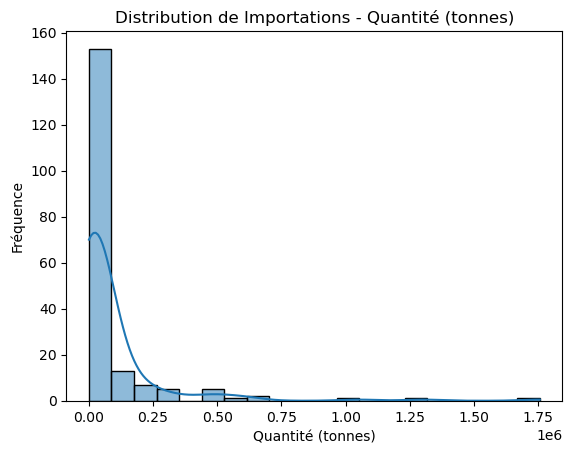

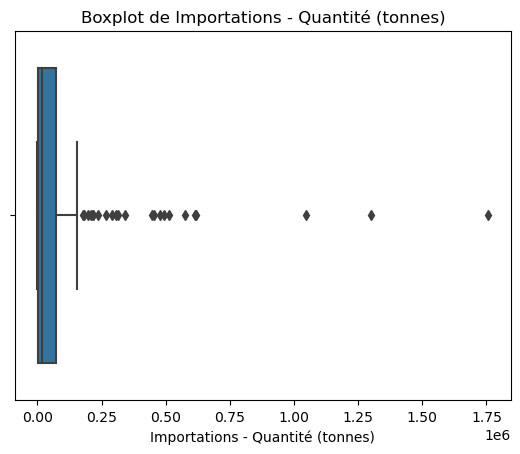

In [115]:
# Histogramme
sns.histplot(df_importExport_2022['Importations - Quantité (tonnes)'], bins=20, kde=True)
plt.title("Distribution de Importations - Quantité (tonnes)")
plt.xlabel("Quantité (tonnes)")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_importExport_2022['Importations - Quantité (tonnes)'])
plt.title("Boxplot de Importations - Quantité (tonnes)")
plt.show()

In [116]:
# Résumé des valeurs aberrantes
q1 = df_importExport_2022['Importations - Quantité (tonnes)'].quantile(0.25)
q3 = df_importExport_2022['Importations - Quantité (tonnes)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_Importations_Quantité = df_importExport_2022[(df_importExport_2022['Importations - Quantité (tonnes)'] < lower_bound) | (df_importExport_2022['Importations - Quantité (tonnes)'] > upper_bound)]
print("Valeurs aberrantes :\n", outliers_Importations_Quantité[["Zone", "Importations - Quantité (tonnes)"]])

Valeurs aberrantes :
 Élément                                               Zone  \
9                                           Afrique du Sud   
24                                               Allemagne   
29                                                  Angola   
39                                         Arabie saoudite   
89                                                Belgique   
178                                                  Chine   
183                               Chine - RAS de Hong-Kong   
193                              Chine, Taiwan Province de   
198                                    Chine, continentale   
233                                                   Cuba   
288                                                 France   
308                                                  Ghana   
383                                                   Iraq   
413                                                  Japon   
490                                             

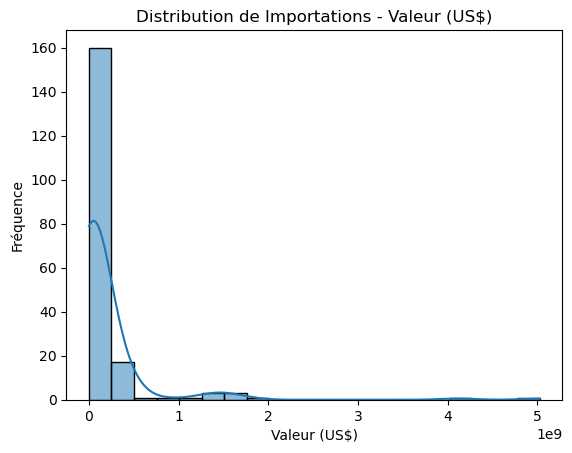

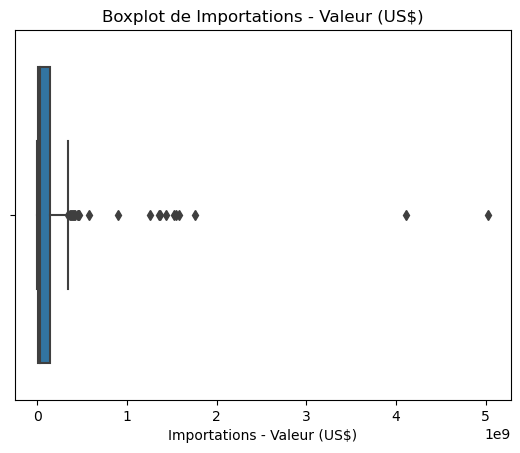

In [117]:
# Histogramme
sns.histplot(df_importExport_2022['Importations - Valeur (US$)'], bins=20, kde=True)
plt.title("Distribution de Importations - Valeur (US$)")
plt.xlabel("Valeur (US$)")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_importExport_2022['Importations - Valeur (US$)'])
plt.title("Boxplot de Importations - Valeur (US$)")
plt.show()

In [118]:
# Résumé des valeurs aberrantes
q1 = df_importExport_2022['Importations - Valeur (US$)'].quantile(0.25)
q3 = df_importExport_2022['Importations - Valeur (US$)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_Importations_Valeur = df_importExport_2022[(df_importExport_2022['Importations - Valeur (US$)'] < lower_bound) | (df_importExport_2022['Importations - Valeur (US$)'] > upper_bound)]
print("Valeurs aberrantes :\n", outliers_Importations_Valeur[["Zone", "Importations - Valeur (US$)"]])

Valeurs aberrantes :
 Élément                                               Zone  \
24                                               Allemagne   
29                                                  Angola   
39                                         Arabie saoudite   
89                                                Belgique   
168                                                 Canada   
178                                                  Chine   
183                               Chine - RAS de Hong-Kong   
198                                    Chine, continentale   
233                                                   Cuba   
288                                                 France   
383                                                   Iraq   
413                                                  Japon   
443                                                 Koweït   
490                                               Malaisie   
530                                             

In [119]:
differents = pd.Series(list(set(outliers_Importations_Quantité["Zone"]).difference(outliers_Importations_Valeur["Zone"])))
print("Valeurs dans outliers_Importations_Quantité mais pas dans outliers_Importations_Valeur :\n", differents)


Valeurs dans outliers_Importations_Quantité mais pas dans outliers_Importations_Valeur :
 0    Chine, Taiwan Province de
1               Afrique du Sud
2                        Ghana
dtype: object


In [120]:
df_importExport_2022.isna().sum()

Élément
Zone                                 0
Année                                0
Exportations - Quantité (tonnes)    59
Exportations - Valeur (US$)         59
Importations - Quantité (tonnes)     3
Importations - Valeur (US$)          3
dtype: int64

In [121]:
df_importExport_2022 = df_importExport_2022[["Zone", "Importations - Quantité (tonnes)", "Importations - Valeur (US$)"]]

In [122]:
df_importExport_2022 = df_importExport_2022[~df_importExport_2022.isna().any(axis=1)]

In [123]:
df_importExport_2022 = df_importExport_2022.set_index('Zone')

In [124]:
df_importExport_2022.head()

Élément,Importations - Quantité (tonnes),Importations - Valeur (US$)
Zone,,
Afghanistan,6902.31,1.164900e+07
Afrique du Sud,290742.62,2.191470e+08
Albanie,43124.46,7.338400e+07
Allemagne,494001.70,1.524674e+09
Angola,308122.71,4.054050e+08


In [125]:
df_importExport_2022.isna().sum()

Élément
Importations - Quantité (tonnes)    0
Importations - Valeur (US$)         0
dtype: int64

In [126]:
df_importExport_2022.shape

(189, 2)

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.6 - Analyse exploratoire du fichier FAOSTAT_data_fr_AgricultureBIO.csv</h3>
</div>

In [127]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_agricultureBIO.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_agricultureBIO.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_agricultureBIO.shape[1]))

Dimensions du dataset df_customer: (6083, 7)
Le tableau comporte 6083 lignes
Le tableau comporte 7 colonnes


In [128]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_agricultureBIO.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_agricultureBIO.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_agricultureBIO.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    6083
Zone       6083
Élément    6083
Produit    6083
Année      6083
Unité      6083
Valeur     6083
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine       1
Zone        227
Élément       2
Produit       6
Année         5
Unité         2
Valeur     3378
dtype: int64



In [129]:
df_agricultureBIO.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Utilisation des terres,Afghanistan,Superficie,Terres agricoles,2018,1000 ha,38010.0
1,Utilisation des terres,Afghanistan,Superficie,Terres agricoles,2019,1000 ha,38010.0
2,Utilisation des terres,Afghanistan,Superficie,Terres agricoles,2020,1000 ha,38313.0
3,Utilisation des terres,Afghanistan,Superficie,Terres agricoles,2021,1000 ha,38313.0
4,Utilisation des terres,Afghanistan,Superficie,Terres agricoles,2022,1000 ha,38313.0


In [130]:
df_agricultureBIO.describe()

,Année,Valeur
count,6083.000000,6083.000000
mean,2020.004603,7480.909999
std,1.414439,38002.932648
min,2018.000000,0.000000
25%,2019.000000,3.448000
50%,2020.000000,50.000000
75%,2021.000000,607.500000
max,2022.000000,522242.600000


In [131]:
df_agricultureBIO.isna().mean()

Domaine    0.0
Zone       0.0
Élément    0.0
Produit    0.0
Année      0.0
Unité      0.0
Valeur     0.0
dtype: float64

In [132]:
df_agricultureBIO = df_agricultureBIO.pivot(index=["Zone", "Élément","Année"], columns="Produit", values="Valeur").reset_index()


In [133]:
df_agricultureBIO[df_agricultureBIO["Année"] == 2022].head()

Produit,Zone,Élément,Année,Prairies et pâturages permanents,Terr. agricoles certifiées biologiques,Terr. agricoles sous agriculture biologique,Terr. de prairies et de pâturages perm. certifiées biologiques,Terr. de prairies et de pâturages perm. sous agriculture biologique,Terres agricoles
4,Afghanistan,Part de terres agricoles,2022,78.99,NaN,0.0000,NaN,NaN,NaN
9,Afghanistan,Superficie,2022,30262.00,0.0938,0.0977,NaN,NaN,38313.0
14,Afrique du Sud,Part de terres agricoles,2022,87.12,NaN,0.0500,NaN,NaN,NaN
19,Afrique du Sud,Superficie,2022,83928.00,91.7673,44.7690,NaN,NaN,96341.0
24,Albanie,Part de terres agricoles,2022,39.56,NaN,0.0600,NaN,NaN,NaN


In [134]:
df_agricultureBIO = df_agricultureBIO[df_agricultureBIO["Élément"] == "Superficie"]

In [135]:
df_agricultureBIO.drop(columns=['Élément'], inplace=True)

In [136]:
df_agricultureBIO[df_agricultureBIO["Année"] == 2022].isna().mean()

Produit
Zone                                                                   0.000000
Année                                                                  0.000000
Prairies et pâturages permanents                                       0.074890
Terr. agricoles certifiées biologiques                                 0.343612
Terr. agricoles sous agriculture biologique                            0.264317
Terr. de prairies et de pâturages perm. certifiées biologiques         0.806167
Terr. de prairies et de pâturages perm. sous agriculture biologique    0.784141
Terres agricoles                                                       0.004405
dtype: float64

In [137]:
df_agricultureBIO_2022 = df_agricultureBIO[df_agricultureBIO["Année"] == 2022]

In [138]:
df_agricultureBIO_2022.head()

Produit,Zone,Année,Prairies et pâturages permanents,Terr. agricoles certifiées biologiques,Terr. agricoles sous agriculture biologique,Terr. de prairies et de pâturages perm. certifiées biologiques,Terr. de prairies et de pâturages perm. sous agriculture biologique,Terres agricoles
9,Afghanistan,2022,30262.0,0.0938,0.0977,NaN,NaN,38313.000
19,Afrique du Sud,2022,83928.0,91.7673,44.7690,NaN,NaN,96341.000
29,Albanie,2022,449.2,0.6000,0.7000,NaN,NaN,1135.600
39,Algérie,2022,32806.5,0.7700,1.0710,NaN,NaN,41310.121
49,Allemagne,2022,4733.0,NaN,1605.5000,NaN,828.2,16595.000


In [139]:
df_agricultureBIO_2022.shape

(227, 8)

In [140]:
# Compter les doublons
duplicate_rows = df_agricultureBIO_2022[df_agricultureBIO_2022["Zone"].duplicated()]
print(f"Nombre de doublons : {len(duplicate_rows)}")


Nombre de doublons : 0


In [141]:
# Vérification des types de données
print(df_agricultureBIO_2022.dtypes)

Produit
Zone                                                                    object
Année                                                                    int64
Prairies et pâturages permanents                                       float64
Terr. agricoles certifiées biologiques                                 float64
Terr. agricoles sous agriculture biologique                            float64
Terr. de prairies et de pâturages perm. certifiées biologiques         float64
Terr. de prairies et de pâturages perm. sous agriculture biologique    float64
Terres agricoles                                                       float64
dtype: object


In [142]:
df_agricultureBIO_2022["Pourcentage terre agricoles BIO"] = df_agricultureBIO_2022["Terr. agricoles sous agriculture biologique"]/df_agricultureBIO_2022['Terres agricoles']*100

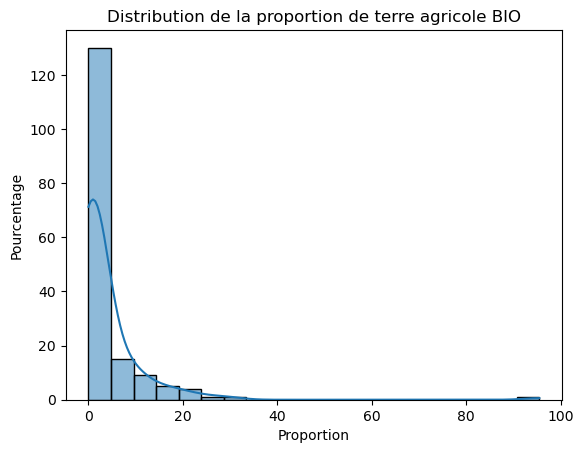

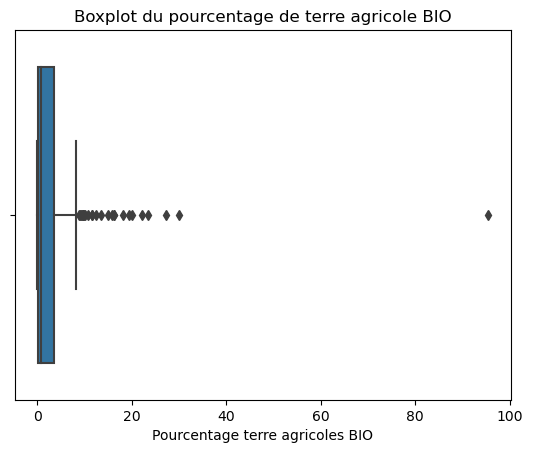

In [143]:
# Histogramme
sns.histplot(df_agricultureBIO_2022["Pourcentage terre agricoles BIO"], bins=20, kde=True)
plt.title("Distribution de la proportion de terre agricole BIO")
plt.xlabel("Proportion")
plt.ylabel("Pourcentage")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_agricultureBIO_2022["Pourcentage terre agricoles BIO"])
plt.title("Boxplot du pourcentage de terre agricole BIO")
plt.show()

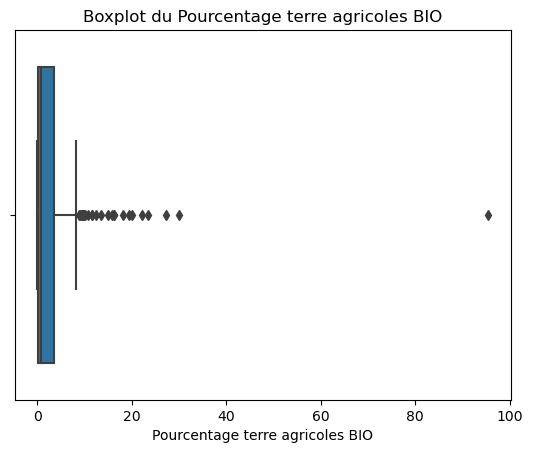

Valeurs aberrantes :
 Produit                  Zone  Année  Prairies et pâturages permanents  \
49                  Allemagne   2022                         4733.0000   
124                 Australie   2022                       331869.0000   
134                  Autriche   2022                         1209.9799   
469                   Croatie   2022                          516.0000   
499                  Danemark   2022                          233.0000   
519                 Dominique   2022                            2.0000   
539                   Espagne   2022                         9885.8420   
549                   Estonie   2022                          274.0000   
579                  Finlande   2022                           20.0000   
589                    France   2022                         8620.5810   
659                     Grèce   2022                         2870.0000   
739          Guyane française   2022                           21.8000   
859             

In [144]:
# Boxplot pour détecter les outliers
sns.boxplot(x=df_agricultureBIO_2022["Pourcentage terre agricoles BIO"])
plt.title("Boxplot du Pourcentage terre agricoles BIO")
plt.show()

# Résumé des valeurs aberrantes
q1 = df_agricultureBIO_2022["Pourcentage terre agricoles BIO"].quantile(0.25)
q3 = df_agricultureBIO_2022["Pourcentage terre agricoles BIO"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_agricultureBIO_2022[(df_agricultureBIO_2022["Pourcentage terre agricoles BIO"] > upper_bound)]
print("Valeurs aberrantes :\n", outliers)

In [145]:
# Vérifier les contraintes logiques
outlier_values = df_agricultureBIO_2022[(df_agricultureBIO_2022['Pourcentage terre agricoles BIO'] > 100) | (df_agricultureBIO_2022['Pourcentage terre agricoles BIO'] < 0) ]
print("Valeurs aberrante détectées :\n", outlier_values)

Valeurs aberrante détectées :
 Empty DataFrame
Columns: [Zone, Année, Prairies et pâturages permanents, Terr. agricoles certifiées biologiques, Terr. agricoles sous agriculture biologique, Terr. de prairies et de pâturages perm. certifiées biologiques, Terr. de prairies et de pâturages perm. sous agriculture biologique, Terres agricoles, Pourcentage terre agricoles BIO]
Index: []


In [146]:
df_agricultureBIO_2022.isna().sum()

Produit
Zone                                                                     0
Année                                                                    0
Prairies et pâturages permanents                                        17
Terr. agricoles certifiées biologiques                                  78
Terr. agricoles sous agriculture biologique                             60
Terr. de prairies et de pâturages perm. certifiées biologiques         183
Terr. de prairies et de pâturages perm. sous agriculture biologique    178
Terres agricoles                                                         1
Pourcentage terre agricoles BIO                                         61
dtype: int64

In [147]:
df_agricultureBIO_2022[df_agricultureBIO_2022['Terr. agricoles certifiées biologiques'] > df_agricultureBIO_2022['Terr. agricoles sous agriculture biologique']]


Produit,Zone,Année,Prairies et pâturages permanents,Terr. agricoles certifiées biologiques,Terr. agricoles sous agriculture biologique,Terr. de prairies et de pâturages perm. certifiées biologiques,Terr. de prairies et de pâturages perm. sous agriculture biologique,Terres agricoles,Pourcentage terre agricoles BIO
19,Afrique du Sud,2022,83928.000,91.7673,44.769,NaN,NaN,96341.0000,0.046469
299,Burundi,2022,483.000,0.5485,0.416,NaN,NaN,2126.5085,0.019563
439,Comores,2022,15.000,1.6990,0.699,NaN,NaN,133.0000,0.525564
935,Koweït,2022,136.000,0.0321,0.025,NaN,NaN,150.0000,0.016667
965,Liban,2022,400.000,1.5896,1.466,0.30,0.30,679.3000,0.215810
1195,Mozambique,2022,35463.832,41.0221,17.089,NaN,NaN,41413.8320,0.041264
1230,Nicaragua,2022,3292.000,32.6296,30.880,0.04,0.04,5091.0000,0.606561
1659,Sainte-Lucie,2022,0.370,0.0250,0.020,NaN,NaN,9.9400,0.201207
1899,Tonga,2022,4.000,1.1190,0.322,NaN,NaN,35.0000,0.920000
1919,Tunisie,2022,4750.000,279.3891,240.582,22.60,22.60,9700.5000,2.480099


In [148]:
df_agricultureBIO_2022.head()

Produit,Zone,Année,Prairies et pâturages permanents,Terr. agricoles certifiées biologiques,Terr. agricoles sous agriculture biologique,Terr. de prairies et de pâturages perm. certifiées biologiques,Terr. de prairies et de pâturages perm. sous agriculture biologique,Terres agricoles,Pourcentage terre agricoles BIO
9,Afghanistan,2022,30262.0,0.0938,0.0977,NaN,NaN,38313.000,0.000255
19,Afrique du Sud,2022,83928.0,91.7673,44.7690,NaN,NaN,96341.000,0.046469
29,Albanie,2022,449.2,0.6000,0.7000,NaN,NaN,1135.600,0.061641
39,Algérie,2022,32806.5,0.7700,1.0710,NaN,NaN,41310.121,0.002593
49,Allemagne,2022,4733.0,NaN,1605.5000,NaN,828.2,16595.000,9.674601


In [149]:
df_agricultureBIO_2022 = df_agricultureBIO_2022[["Zone", "Terr. agricoles sous agriculture biologique", "Terres agricoles","Pourcentage terre agricoles BIO"]]

In [150]:
df_agricultureBIO_2022 = df_agricultureBIO_2022[~df_agricultureBIO_2022.isna().any(axis=1)]

In [151]:
df_agricultureBIO_2022.shape

(166, 4)

In [152]:
df_agricultureBIO_2022 = df_agricultureBIO_2022.set_index('Zone')

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.7 - Analyse exploratoire du fichier FAOSTAT_data_fr_tauxDeChange.csv</h3>
</div>

In [153]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_tauxDeChange.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_tauxDeChange.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_tauxDeChange.shape[1]))

Dimensions du dataset df_customer: (2094, 8)
Le tableau comporte 2094 lignes
Le tableau comporte 8 colonnes


In [154]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_tauxDeChange.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_tauxDeChange.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_tauxDeChange.nunique()))

La nature des données dans chacune des colonnes:
Domaine     object
Zone        object
Devise      object
Élément     object
Année        int64
Mois        object
Unité      float64
Valeur     float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
Domaine    2094
Zone       2094
Devise     2094
Élément    2094
Année      2094
Mois       2094
Unité         0
Valeur     2094
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
Domaine      1
Zone       225
Devise     154
Élément      2
Année        5
Mois         1
Unité        0
Valeur     660
dtype: int64



In [155]:
#Affiche les 5 premières lignes de la table
df_tauxDeChange.head()

,Domaine,Zone,Devise,Élément,Année,Mois,Unité,Valeur
0,Taux de change,Afghanistan,Afghani,Unités de monnaie locale par USD,2018,Valeur annuel,NaN,72.083247
1,Taux de change,Afghanistan,Afghani,Unités de monnaie locale par USD,2019,Valeur annuel,NaN,77.737949
2,Taux de change,Afghanistan,Afghani,Unités de monnaie locale par USD,2020,Valeur annuel,NaN,76.813536
3,Taux de change,Afghanistan,Afghani,Unités de monnaie locale standardisée par USD,2018,Valeur annuel,NaN,72.083247
4,Taux de change,Afghanistan,Afghani,Unités de monnaie locale standardisée par USD,2019,Valeur annuel,NaN,77.737949


In [156]:
df_tauxDeChange["Élément"].unique()

array(['Unités de monnaie locale par USD',
       'Unités de monnaie locale standardisée par USD'], dtype=object)

In [157]:
df_tauxDeChange = df_tauxDeChange[["Zone","Élément","Année","Valeur"]]

In [158]:
df_tauxDeChange = df_tauxDeChange.pivot(index=["Zone","Année"], columns="Élément", values="Valeur").reset_index()


In [159]:
df_tauxDeChange.head()

Élément,Zone,Année,Unités de monnaie locale par USD,Unités de monnaie locale standardisée par USD
0,Afghanistan,2018,72.083247,72.083247
1,Afghanistan,2019,77.737949,77.737949
2,Afghanistan,2020,76.813536,76.813536
3,Afghanistan,2021,NaN,82.526108
4,Afghanistan,2022,NaN,90.542640


In [160]:
df_tauxDeChange = df_tauxDeChange[["Zone", "Année","Unités de monnaie locale par USD"]]

In [161]:
df_tauxDeChange.isna().sum()

Élément
Zone                                 0
Année                                0
Unités de monnaie locale par USD    81
dtype: int64

In [162]:
df_tauxDeChange_2022 = df_tauxDeChange[df_tauxDeChange["Année"] == 2022]

In [163]:
df_tauxDeChange_2022.isna().sum()

Élément
Zone                                 0
Année                                0
Unités de monnaie locale par USD    20
dtype: int64

In [164]:
df_tauxDeChange_isna = df_tauxDeChange_2022[df_tauxDeChange_2022.isna().any(axis=1)]
print(df_tauxDeChange_isna.shape)
df_tauxDeChange_isna["Zone"]

(20, 3)


4                                      Afghanistan
249                                           Cuba
344                                      Groenland
369                                         Guinée
524                                  Liechtenstein
554                                         Malawi
709                                      Palestine
749                                     Porto Rico
809               République démocratique du Congo
819     République populaire démocratique de Corée
824                    République-Unie de Tanzanie
914                                        Somalie
929                                      Sri Lanka
1004                                  Turkménistan
1014                                        Tuvalu
1034        Venezuela (République bolivarienne du)
1099                                     Îles Cook
1104                                 Îles Marshall
1114                       Îles Turques-et-Caïques
1119                     Îles V

In [165]:
df_FAOSTAT = df_tauxDeChange_2022.copy()
df_FAOSTAT = df_FAOSTAT.set_index('Zone')

df_tauxDeChange_2022 = df_tauxDeChange_2022[~df_tauxDeChange_2022.isna().any(axis=1)]

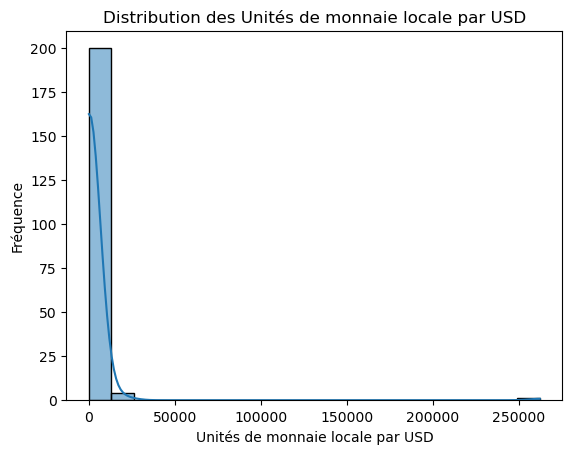

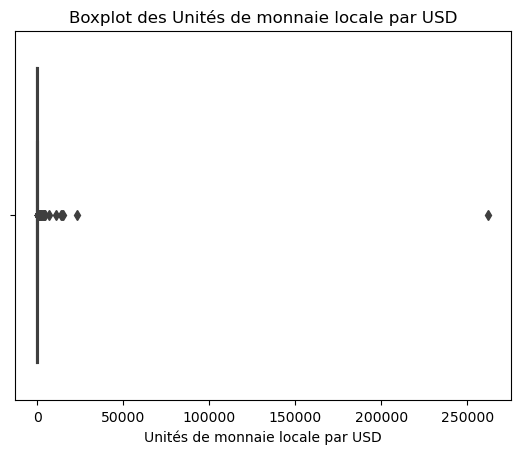

In [166]:
# Histogramme
sns.histplot(df_tauxDeChange_2022["Unités de monnaie locale par USD"], bins=20, kde=True)
plt.title("Distribution des Unités de monnaie locale par USD")
plt.xlabel("Unités de monnaie locale par USD")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_tauxDeChange_2022["Unités de monnaie locale par USD"])
plt.title("Boxplot des Unités de monnaie locale par USD")
plt.show()

In [167]:
# Résumé des valeurs aberrantes
q1 = df_tauxDeChange_2022['Unités de monnaie locale par USD'].quantile(0.25)
q3 = df_tauxDeChange_2022['Unités de monnaie locale par USD'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_tauxDeChange_2022[(df_tauxDeChange_2022['Unités de monnaie locale par USD'] < lower_bound) | (df_tauxDeChange_2022['Unités de monnaie locale par USD'] > upper_bound)]
print("Valeurs aberrantes :\n", outliers[["Zone", "Unités de monnaie locale par USD"]])

Valeurs aberrantes :
 Élément                                   Zone  \
34                                      Angola   
59                                     Arménie   
154                               Burkina Faso   
159                                    Burundi   
169                                      Bénin   
179                                   Cambodge   
184                                   Cameroun   
194                                      Chili   
224                                   Colombie   
229                                    Comores   
234                                      Congo   
239                                 Costa Rica   
259                              Côte d'Ivoire   
319                                      Gabon   
374                         Guinée équatoriale   
379                              Guinée-Bissau   
409                                    Hongrie   
419                                  Indonésie   
424             Iran (Républ

In [168]:
df_tauxDeChange_2022 = df_tauxDeChange_2022.set_index('Zone')

In [169]:
df_tauxDeChange_2022.head()

Élément,Année,Unités de monnaie locale par USD
Zone,,
Afrique du Sud,2022,16.355853
Albanie,2022,113.041667
Algérie,2022,141.994975
Allemagne,2022,0.950916
Andorre,2022,0.950916


In [170]:
print("Dimensions du dataset df_customer: {}".format(df_tauxDeChange_2022.shape))

Dimensions du dataset df_customer: (205, 2)


<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.8 - Analyse exploratoire du fichier WBG_data_fr.csv</h3>
</div>

In [171]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_WBG.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_WBG.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_WBG.shape[1]))

Dimensions du dataset df_customer: (3995, 9)
Le tableau comporte 3995 lignes
Le tableau comporte 9 colonnes


In [172]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_WBG.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_WBG.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_WBG.nunique()))

La nature des données dans chacune des colonnes:
pays Name        object
pays Code        object
série Name       object
série Code       object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
pays Name        3962
pays Code        3990
série Name       3990
série Code       3990
2018 [YR2018]    3990
2019 [YR2019]    3990
2020 [YR2020]    3990
2021 [YR2021]    3990
2022 [YR2022]    3990
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
pays Name         266
pays Code         266
série Name         15
série Code         15
2018 [YR2018]    3185
2019 [YR2019]    3178
2020 [YR2020]    2703
2021 [YR2021]    2695
2022 [YR2022]    2597
dtype: int64



In [173]:
df_WBG.head()

,pays Name,pays Code,série Name,série Code,2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,PIB ($ US courants),NY.GDP.MKTP.CD,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904
1,Afghanistan,AFG,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,492.090630986151,497.741431256813,512.055098005672,355.777826392648,352.603733092107
2,Afghanistan,AFG,"PIB par habitant, ($ PPA internationaux courants)",NY.GDP.PCAP.PP.CD,2436.0063198102,2589.410395542,2568.34190916779,2138.87024713086,2092.87995224662
3,Afghanistan,AFG,"PIB, ($ PPA internationaux courants)",NY.GDP.MKTP.PP.CD,89369237677.5116,97800733345.013,100094011602.726,85767546197.7544,86077580286.4421
4,Afghanistan,AFG,"Facteur de conversion PPA, consommation privée...",PA.NUS.PRVT.PP,15.5537950639985,15.3789969399374,15.7871930848428,15.9897813796997,..


In [174]:
df_WBG.describe()

,pays Name,pays Code,série Name,série Code,2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,3962,3990,3990,3990,3990,3990,3990,3990,3990
unique,266,266,15,15,3185,3178,2703,2695,2597
top,Afghanistan,AFG,PIB ($ US courants),NY.GDP.MKTP.CD,..,..,..,..,..
freq,15,15,266,266,484,493,1203,1211,1307


In [175]:
df_WBG.isna().mean()

pays Name        0.008260
pays Code        0.001252
série Name       0.001252
série Code       0.001252
2018 [YR2018]    0.001252
2019 [YR2019]    0.001252
2020 [YR2020]    0.001252
2021 [YR2021]    0.001252
2022 [YR2022]    0.001252
dtype: float64

In [176]:
df_WBG_2022 = df_WBG.copy()
df_WBG_2022.drop(columns=['2018 [YR2018]', '2019 [YR2019]', "2020 [YR2020]", "2021 [YR2021]"], inplace=True)

In [177]:
df_WBG_2022.head(20)

,pays Name,pays Code,série Name,série Code,2022 [YR2022]
0,Afghanistan,AFG,PIB ($ US courants),NY.GDP.MKTP.CD,14502158192.0904
1,Afghanistan,AFG,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,352.603733092107
2,Afghanistan,AFG,"PIB par habitant, ($ PPA internationaux courants)",NY.GDP.PCAP.PP.CD,2092.87995224662
3,Afghanistan,AFG,"PIB, ($ PPA internationaux courants)",NY.GDP.MKTP.PP.CD,86077580286.4421
4,Afghanistan,AFG,"Facteur de conversion PPA, consommation privée...",PA.NUS.PRVT.PP,..
5,Afghanistan,AFG,"Facteur de conversion PPA, PIB (unités de devi...",PA.NUS.PPP,14.9102820470681
6,Afghanistan,AFG,Importations de biens et de services (% du PIB),NE.IMP.GNFS.ZS,54.5054272070161
7,Afghanistan,AFG,"Inflation, déflateur du PIB (% annuel)",NY.GDP.DEFL.KD.ZG,9.40623933931322
8,Afghanistan,AFG,Taux de change officiel (unités de devises loc...,PA.NUS.FCRF,..
9,Afghanistan,AFG,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,-6.24017199240269


In [178]:
df_WBG_2022.isna().sum()

pays Name        33
pays Code         5
série Name        5
série Code        5
2022 [YR2022]     5
dtype: int64

In [179]:
df_WBG_2022.shape

(3995, 5)

In [180]:
# Identifier les doublons
doublons = df_WBG_2022[df_WBG_2022.duplicated(subset=['pays Name', 'série Name'], keep=False)]

print("\nDoublons détectés :\n", doublons)
print(doublons.shape)


Doublons détectés :
      pays Name pays Code                                         série Name  \
3255       NaN       AFE                                PIB ($ US courants)   
3256       NaN       AFE                   PIB par habitant ($ US courants)   
3257       NaN       AFE  PIB par habitant, ($ PPA internationaux courants)   
3258       NaN       AFE               PIB, ($ PPA internationaux courants)   
3259       NaN       AFE  Facteur de conversion PPA, consommation privée...   
3260       NaN       AFE  Facteur de conversion PPA, PIB (unités de devi...   
3261       NaN       AFE    Importations de biens et de services (% du PIB)   
3262       NaN       AFE             Inflation, déflateur du PIB (% annuel)   
3263       NaN       AFE  Taux de change officiel (unités de devises loc...   
3264       NaN       AFE                       Croissance du PIB (% annuel)   
3265       NaN       AFE          Croissance du PIB par habitant (% annuel)   
3266       NaN       AFE  Poli

In [181]:
df_WBG_2022 = df_WBG_2022[~df_WBG_2022["pays Name"].isna()]

In [182]:
print(df_WBG_2022.shape)
print(df_WBG_2022.isna().sum())

(3962, 5)
pays Name        0
pays Code        2
série Name       2
série Code       2
2022 [YR2022]    2
dtype: int64


In [183]:
df_WBG_2022_isna = df_WBG_2022[df_WBG_2022["2022 [YR2022]"].isna()]
df_WBG_2022_isna

,pays Name,pays Code,série Name,série Code,2022 [YR2022]
3993,Data from Database: Indicateurs du développeme...,NaN,NaN,NaN,NaN
3994,Last Updated: 11/13/2024,NaN,NaN,NaN,NaN


In [184]:
df_WBG_2022 = df_WBG_2022[~df_WBG_2022["2022 [YR2022]"].isna()]

In [185]:
print(df_WBG_2022.shape)
print(df_WBG_2022.isna().sum())

(3960, 5)
pays Name        0
pays Code        0
série Name       0
série Code       0
2022 [YR2022]    0
dtype: int64


In [186]:
df_WBG_2022 = df_WBG_2022.pivot(index=["pays Name","pays Code"], columns="série Name", values="2022 [YR2022]").reset_index()


In [187]:
df_WBG_2022.head()

série Name,pays Name,pays Code,"Coût des procédures dimportation, formalités documentaires (USD)","Coût des procédures dimportation, formalités douanières (USD)",Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Délai des procédures dimportation, formalités douanières (heures)","Facteur de conversion PPA, PIB (unités de devises locales par $ international)","Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate,"Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)"
0,Afghanistan,AFG,..,..,-6.24017199240269,-8.58665190075376,..,14.9102820470681,..,54.5054272070161,9.40623933931322,14502158192.0904,352.603733092107,2092.87995224662,86077580286.4421,-2.54495596885681,..
1,Afrique du Nord et Moyen-Orient,MEA,..,..,5.74836266642129,4.22526861134256,..,..,..,..,15.6127413713078,4497116837259.17,9116.77278273094,19980.1594609486,9855802449432.05,..,..
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),TMN,..,..,4.41432161507478,2.88022028813435,..,..,..,29.7103684042994,22.8860752407762,1740947356984.75,4152.18363676059,13734.4700651771,5758654108615.19,..,..
3,Afrique du Nord et Moyen-Orient (hors revenu é...,MNA,..,..,4.41129157016933,2.86572887450622,..,..,..,30.0827571395223,16.6559322421753,1760103359907.54,4147.97463172171,13642.7116155089,5788989732258.77,..,..
4,Afrique du Sud,ZAF,..,..,1.91040617007184,1.05687467771507,..,7.2189184212586,7.45741725230404,31.5222896280307,4.75948416121869,405270850098.738,6766.48125428394,15330.7692737479,918219331843.39,-0.681386351585388,16.3558534845


In [188]:
print(df_WBG_2022.shape)
print(df_WBG_2022.isna().sum())

(264, 17)
série Name
pays Name                                                                                         0
pays Code                                                                                         0
Coût des procédures dimportation, formalités documentaires (USD)                                 0
Coût des procédures dimportation, formalités douanières (USD)                                    0
Croissance du PIB (% annuel)                                                                      0
Croissance du PIB par habitant (% annuel)                                                         0
Délai des procédures dimportation, formalités douanières (heures)                                0
Facteur de conversion PPA, PIB (unités de devises locales par $ international)                    0
Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)    0
Importations de biens et de services (% du PIB)                                

In [189]:
df_WBG_2022 = df_WBG_2022.rename(columns={'pays Name': 'Zone', 
                        'Coût des procédures dimportation, formalités documentaires (USD)': 'Coût des procédures d\'importation, formalités documentaires (USD)',
                        'Coût des procédures dimportation, formalités douanières (USD)': 'Coût des procédures d\'importation, formalités douanières (USD)', 
                        'Délai des procédures dimportation, formalités douanières (heures)': 'Délai des procédures d\'importation, formalités douanières (heures)'})


In [190]:
df_WBG_2022.head()

série Name,Zone,pays Code,"Coût des procédures d'importation, formalités documentaires (USD)","Coût des procédures d'importation, formalités douanières (USD)",Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Délai des procédures d'importation, formalités douanières (heures)","Facteur de conversion PPA, PIB (unités de devises locales par $ international)","Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate,"Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)"
0,Afghanistan,AFG,..,..,-6.24017199240269,-8.58665190075376,..,14.9102820470681,..,54.5054272070161,9.40623933931322,14502158192.0904,352.603733092107,2092.87995224662,86077580286.4421,-2.54495596885681,..
1,Afrique du Nord et Moyen-Orient,MEA,..,..,5.74836266642129,4.22526861134256,..,..,..,..,15.6127413713078,4497116837259.17,9116.77278273094,19980.1594609486,9855802449432.05,..,..
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),TMN,..,..,4.41432161507478,2.88022028813435,..,..,..,29.7103684042994,22.8860752407762,1740947356984.75,4152.18363676059,13734.4700651771,5758654108615.19,..,..
3,Afrique du Nord et Moyen-Orient (hors revenu é...,MNA,..,..,4.41129157016933,2.86572887450622,..,..,..,30.0827571395223,16.6559322421753,1760103359907.54,4147.97463172171,13642.7116155089,5788989732258.77,..,..
4,Afrique du Sud,ZAF,..,..,1.91040617007184,1.05687467771507,..,7.2189184212586,7.45741725230404,31.5222896280307,4.75948416121869,405270850098.738,6766.48125428394,15330.7692737479,918219331843.39,-0.681386351585388,16.3558534845


In [191]:
# Remplacer .. par NaN

df_WBG_2022 = df_WBG_2022.replace("..", np.nan)

In [192]:
print(df_WBG_2022.shape)
print(df_WBG_2022.isna().sum())

(264, 17)
série Name
Zone                                                                                                0
pays Code                                                                                           0
Coût des procédures d'importation, formalités documentaires (USD)                                 264
Coût des procédures d'importation, formalités douanières (USD)                                    264
Croissance du PIB (% annuel)                                                                       16
Croissance du PIB par habitant (% annuel)                                                          17
Délai des procédures d'importation, formalités douanières (heures)                                264
Facteur de conversion PPA, PIB (unités de devises locales par $ international)                     69
Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)     97
Importations de biens et de services (% du PIB)              

In [193]:
df_WBG_2022.head()

série Name,Zone,pays Code,"Coût des procédures d'importation, formalités documentaires (USD)","Coût des procédures d'importation, formalités douanières (USD)",Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Délai des procédures d'importation, formalités douanières (heures)","Facteur de conversion PPA, PIB (unités de devises locales par $ international)","Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate,"Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)"
0,Afghanistan,AFG,NaN,NaN,-6.24017199240269,-8.58665190075376,NaN,14.9102820470681,NaN,54.5054272070161,9.40623933931322,14502158192.0904,352.603733092107,2092.87995224662,86077580286.4421,-2.54495596885681,NaN
1,Afrique du Nord et Moyen-Orient,MEA,NaN,NaN,5.74836266642129,4.22526861134256,NaN,NaN,NaN,NaN,15.6127413713078,4497116837259.17,9116.77278273094,19980.1594609486,9855802449432.05,NaN,NaN
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),TMN,NaN,NaN,4.41432161507478,2.88022028813435,NaN,NaN,NaN,29.7103684042994,22.8860752407762,1740947356984.75,4152.18363676059,13734.4700651771,5758654108615.19,NaN,NaN
3,Afrique du Nord et Moyen-Orient (hors revenu é...,MNA,NaN,NaN,4.41129157016933,2.86572887450622,NaN,NaN,NaN,30.0827571395223,16.6559322421753,1760103359907.54,4147.97463172171,13642.7116155089,5788989732258.77,NaN,NaN
4,Afrique du Sud,ZAF,NaN,NaN,1.91040617007184,1.05687467771507,NaN,7.2189184212586,7.45741725230404,31.5222896280307,4.75948416121869,405270850098.738,6766.48125428394,15330.7692737479,918219331843.39,-0.681386351585388,16.3558534845


In [194]:
# Nettoyer les noms des colonnes (supprimer les espaces avant/après et les caractères spéciaux)
df_WBG_2022.columns = df_WBG_2022.columns.str.strip()  # Supprime les espaces au début et à la fin
df_WBG_2022.columns = df_WBG_2022.columns.str.replace(r'\s+', ' ', regex=True)  # Remplace les espaces multiples par un seul espace

In [195]:
df_WBG_2022 = df_WBG_2022.drop(["Coût des procédures d'importation, formalités documentaires (USD)","Coût des procédures d'importation, formalités douanières (USD)","Délai des procédures d'importation, formalités douanières (heures)", "Facteur de conversion PPA, consommation privée (unités de devises locales par $ international)", "Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)"], axis=1)

In [196]:
print(df_WBG_2022.shape)
print(df_WBG_2022.isna().sum())
print(df_WBG_2022.describe())

(264, 12)
série Name
Zone                                                                               0
pays Code                                                                          0
Croissance du PIB (% annuel)                                                      16
Croissance du PIB par habitant (% annuel)                                         17
Facteur de conversion PPA, PIB (unités de devises locales par $ international)    69
Importations de biens et de services (% du PIB)                                   52
Inflation, déflateur du PIB (% annuel)                                            16
PIB ($ US courants)                                                               16
PIB par habitant ($ US courants)                                                  16
PIB par habitant, ($ PPA internationaux courants)                                 24
PIB, ($ PPA internationaux courants)                                              24
Political Stability and Absence of Violence/

In [197]:
#df_WBG_2022 = df_WBG_2022.set_index('Zone')

In [198]:
index_avec_valeur_nulle = df_WBG_2022[df_WBG_2022.isnull().any(axis=1)].index

In [199]:
df_WBG_2022 = df_WBG_2022.drop(index=index_avec_valeur_nulle)

In [200]:
df_WBG_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 260
Data columns (total 12 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Zone                                                                            163 non-null    object
 1   pays Code                                                                       163 non-null    object
 2   Croissance du PIB (% annuel)                                                    163 non-null    object
 3   Croissance du PIB par habitant (% annuel)                                       163 non-null    object
 4   Facteur de conversion PPA, PIB (unités de devises locales par $ international)  163 non-null    object
 5   Importations de biens et de services (% du PIB)                                 163 non-null    object
 6   Inflation, déflateur du PI

In [201]:
#Exclure les colonnes 
cols_to_exclude = ['Zone', "pays Code"]
cols_to_convert = df_WBG_2022.columns.difference(cols_to_exclude)  # Sélectionne toutes les colonnes sauf 'col3'


# Convertir les colonnes en numérique (les erreurs sont remplacées par NaN)
df_WBG_2022[cols_to_convert] = df_WBG_2022[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [202]:
df_WBG_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 260
Data columns (total 12 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Zone                                                                            163 non-null    object 
 1   pays Code                                                                       163 non-null    object 
 2   Croissance du PIB (% annuel)                                                    163 non-null    float64
 3   Croissance du PIB par habitant (% annuel)                                       163 non-null    float64
 4   Facteur de conversion PPA, PIB (unités de devises locales par $ international)  163 non-null    float64
 5   Importations de biens et de services (% du PIB)                                 163 non-null    float64
 6   Inflation, déflate

In [203]:
df_WBG_2022.describe()

série Name,Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Facteur de conversion PPA, PIB (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate
count,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000,163.000000,1.630000e+02,163.000000
mean,3.734918,2.625508,772.052792,53.163203,13.326902,6.007046e+11,17888.609343,28285.380279,1.014824e+12,-0.079866
std,5.360698,4.968594,5680.055981,30.757514,25.736382,2.516902e+12,25176.867630,29511.412346,3.453123e+12,0.929973
min,-28.758591,-22.369886,0.338918,1.127673,-11.693138,1.538246e+08,259.025031,917.506035,1.551424e+08,-2.560744
25%,2.420273,0.991571,0.910507,30.902127,4.960349,1.410681e+10,2321.235421,6365.271427,3.737340e+10,-0.630033
50%,3.949000,2.544333,6.625217,47.809195,7.300034,5.166688e+10,6810.114041,16803.090062,1.356400e+11,-0.094513
75%,5.653192,4.933031,141.376282,65.389978,13.339599,3.237232e+11,21393.929629,43275.538398,6.304790e+11,0.718067
max,20.016464,19.350915,71026.728481,190.385746,264.580608,2.574411e+13,125006.021815,146457.020544,3.177315e+13,1.483080


In [204]:
df_WBG_2022.columns

Index(['Zone', 'pays Code', 'Croissance du PIB (% annuel)',
       'Croissance du PIB par habitant (% annuel)',
       'Facteur de conversion PPA, PIB (unités de devises locales par $ international)',
       'Importations de biens et de services (% du PIB)',
       'Inflation, déflateur du PIB (% annuel)', 'PIB ($ US courants)',
       'PIB par habitant ($ US courants)',
       'PIB par habitant, ($ PPA internationaux courants)',
       'PIB, ($ PPA internationaux courants)',
       'Political Stability and Absence of Violence/Terrorism: Estimate'],
      dtype='object', name='série Name')

C:\Users\kevin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 146 (\x92) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kevin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


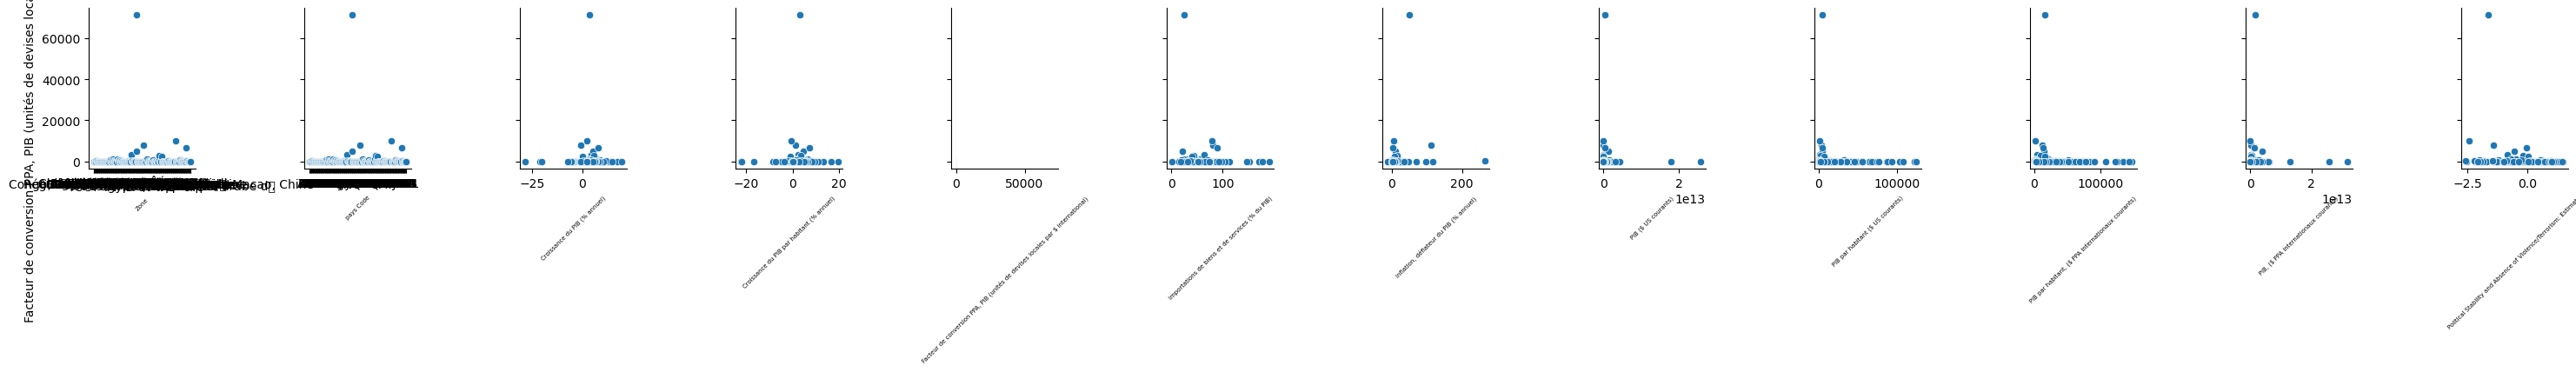

In [205]:
colonnes_df_WBG_2022 = df_WBG_2022.columns.tolist()

# Créer la matrice des graphiques bivariés
pairplot = sns.pairplot(
    df_WBG_2022,
    x_vars=colonnes_df_WBG_2022,
    y_vars=['Facteur de conversion PPA, PIB (unités de devises locales par $ international)'],    
)

for ax in pairplot.axes.flat:
    # Rotation et taille des étiquettes de l'axe X
    ax.set_xlabel(ax.get_xlabel(), fontsize=5, rotation=45)  # Changez fontsize et rotation ici
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)  # Changez fontsize et rotation ici

    
plt.show()

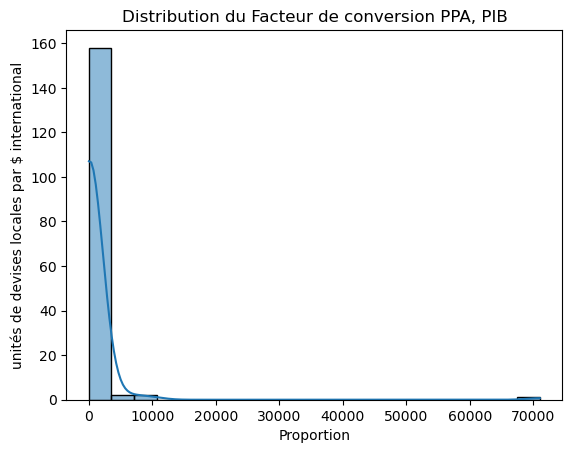

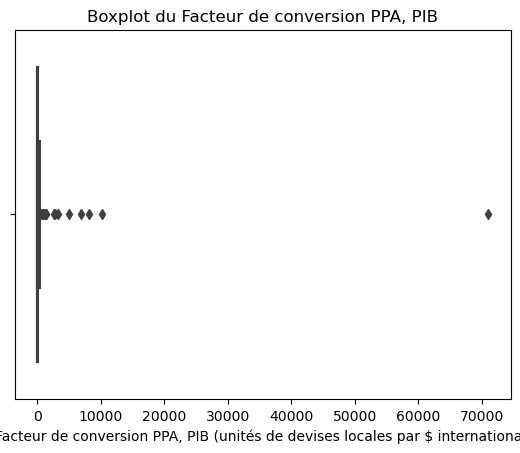

In [206]:
#df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"]

# Histogramme
sns.histplot(df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"], bins=20, kde=True)
plt.title("Distribution du Facteur de conversion PPA, PIB")
plt.xlabel("Proportion")
plt.ylabel("unités de devises locales par $ international")
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"])
plt.title("Boxplot du Facteur de conversion PPA, PIB")
plt.show()

In [207]:
index_liste = df_WBG_2022.index.tolist()

print(index_liste)
print(len(index_liste))
print(df_WBG_2022["Zone"])

[0, 4, 8, 9, 10, 16, 17, 18, 19, 20, 21, 27, 29, 30, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 70, 71, 72, 74, 75, 76, 77, 83, 84, 86, 87, 88, 89, 90, 94, 96, 97, 98, 99, 101, 102, 103, 104, 108, 109, 110, 112, 113, 114, 115, 117, 119, 120, 121, 122, 125, 126, 127, 128, 131, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 149, 150, 151, 153, 154, 155, 156, 159, 161, 162, 164, 165, 166, 167, 168, 170, 174, 178, 179, 181, 182, 183, 184, 190, 191, 192, 193, 195, 196, 198, 199, 200, 206, 209, 210, 211, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 231, 233, 235, 237, 238, 240, 242, 243, 249, 251, 253, 254, 259, 260]
163
0         Afghanistan
4      Afrique du Sud
8             Albanie
9             Algérie
10          Allemagne
            ...      
251          Équateur
253        États-Unis
254          Éthiopie
259     Îles Marshall
260      Îles Salomon
Name: Zo

In [208]:
# Résumé des valeurs aberrantes
q1 = df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"].quantile(0.25)
q3 = df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_WBG_2022[(df_WBG_2022["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"] > upper_bound)][["Zone", "Facteur de conversion PPA, PIB (unités de devises locales par $ international)"]]
print("Valeurs aberrantes :\n", outliers)

Valeurs aberrantes :
 série Name                               Zone  \
48                                    Burundi   
52                                   Cambodge   
55                                      Chili   
60                                   Colombie   
63          Congo, République démocratique du   
64                       Corée, République de   
97                                     Guinée   
109                                 Indonésie   
110             Iran, République islamique d   
127                                     Liban   
134                                Madagascar   
149                                  Mongolie   
164                                   Ouganda   
165                               Ouzbékistan   
170                                  Paraguay   
215                                   Somalie   
224                                  Tanzanie   
240                                  Viet Nam   

série Name  Facteur de conversion PPA, PIB (un

In [209]:
# Détection des anomalies via la méthode Z-score
from scipy.stats import zscore
df_WBG_2022_anomalie = df_WBG_2022.copy()
# Calculer les scores Z
df_WBG_2022_anomalie['z_score'] = zscore(df_WBG_2022_anomalie['Facteur de conversion PPA, PIB (unités de devises locales par $ international)'])

# Filtrer les anomalies avec un seuil de Z-score
anomalies = df_WBG_2022_anomalie[df_WBG_2022_anomalie['z_score'].abs() > 3]
print("Anomalies détectées avec Z-score :\n", anomalies[["Zone", "Facteur de conversion PPA, PIB (unités de devises locales par $ international)"]])

# Supprimer les anomalies
#df_WBG_2022_anomalie = df_WBG_2022_anomalie[df_WBG_2022_anomalie['z_score'].abs() <= 3]

Anomalies détectées avec Z-score :
 série Name                           Zone  \
110         Iran, République islamique d   

série Name  Facteur de conversion PPA, PIB (unités de devises locales par $ international)  
110                                              71026.728481                               


In [210]:
df_WBG_2022.describe()

série Name,Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Facteur de conversion PPA, PIB (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate
count,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000,163.000000,1.630000e+02,163.000000
mean,3.734918,2.625508,772.052792,53.163203,13.326902,6.007046e+11,17888.609343,28285.380279,1.014824e+12,-0.079866
std,5.360698,4.968594,5680.055981,30.757514,25.736382,2.516902e+12,25176.867630,29511.412346,3.453123e+12,0.929973
min,-28.758591,-22.369886,0.338918,1.127673,-11.693138,1.538246e+08,259.025031,917.506035,1.551424e+08,-2.560744
25%,2.420273,0.991571,0.910507,30.902127,4.960349,1.410681e+10,2321.235421,6365.271427,3.737340e+10,-0.630033
50%,3.949000,2.544333,6.625217,47.809195,7.300034,5.166688e+10,6810.114041,16803.090062,1.356400e+11,-0.094513
75%,5.653192,4.933031,141.376282,65.389978,13.339599,3.237232e+11,21393.929629,43275.538398,6.304790e+11,0.718067
max,20.016464,19.350915,71026.728481,190.385746,264.580608,2.574411e+13,125006.021815,146457.020544,3.177315e+13,1.483080


In [211]:
df_WBG_2022.head()

série Name,Zone,pays Code,Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Facteur de conversion PPA, PIB (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,AFG,-6.240172,-8.586652,14.910282,54.505427,9.406239,1.450216e+10,352.603733,2092.879952,8.607758e+10,-2.544956
4,Afrique du Sud,ZAF,1.910406,1.056875,7.218918,31.522290,4.759484,4.052709e+11,6766.481254,15330.769274,9.182193e+11,-0.681386
8,Albanie,ALB,4.856402,6.139017,39.492906,47.754258,9.866013,1.891638e+10,6810.114041,19492.783099,5.414489e+10,0.106261
9,Algérie,DZA,3.600000,1.926701,44.501117,20.394351,22.886075,2.255603e+11,5023.252932,16028.287109,7.197218e+11,-0.650652
10,Allemagne,DEU,1.806209,1.074952,0.694484,48.956410,5.268325,4.082469e+12,48717.991140,66616.022245,5.582288e+12,0.628492


In [212]:
#Analyse sur le PIB

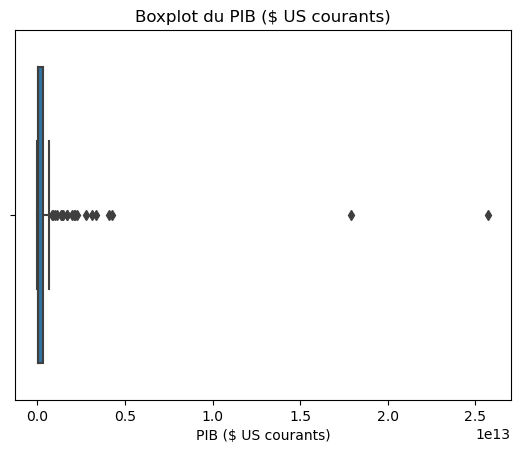

In [213]:
# Boxplot pour détecter les outliers
sns.boxplot(x=df_WBG_2022['PIB ($ US courants)'])
plt.title("Boxplot du PIB ($ US courants)")
plt.show()

In [214]:
# Détection des anomalies via la méthode Z-score
from scipy.stats import zscore
df_WBG_2022_anomalie = df_WBG_2022.copy()
# Calculer les scores Z
df_WBG_2022_anomalie['z_score'] = zscore(df_WBG_2022_anomalie['PIB ($ US courants)'])

# Filtrer les anomalies avec un seuil de Z-score
anomalies = df_WBG_2022_anomalie[df_WBG_2022_anomalie['z_score'].abs() > 3]
print("Anomalies détectées avec Z-score :\n", anomalies[["Zone", "PIB ($ US courants)"]])


Anomalies détectées avec Z-score :
 série Name        Zone  PIB ($ US courants)
56               Chine         1.788178e+13
253         États-Unis         2.574411e+13


In [215]:
df_WBG_2022_analyse = df_WBG_2022.copy()

In [216]:
df_WBG_2022_analyse["PIB/habitant PPA Calculer"] = df_WBG_2022_analyse["PIB par habitant ($ US courants)"]/df_WBG_2022_analyse["Facteur de conversion PPA, PIB (unités de devises locales par $ international)"]

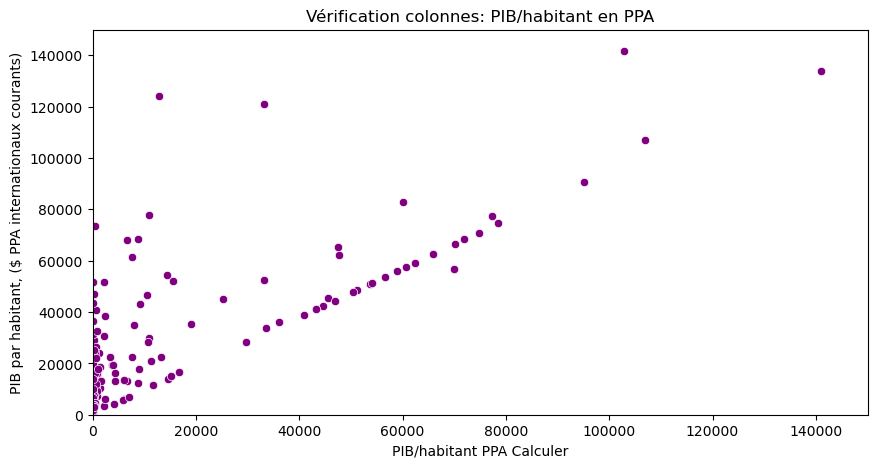

In [217]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_WBG_2022_analyse["PIB/habitant PPA Calculer"], y=df_WBG_2022_analyse["PIB par habitant, ($ PPA internationaux courants)"], color='purple')
plt.title("Vérification colonnes: PIB/habitant en PPA")
plt.xlabel("PIB/habitant PPA Calculer")
plt.ylabel('PIB par habitant, ($ PPA internationaux courants)')

# Utiliser MultipleLocator pour définir un espacement automatique
ax = plt.gca()  # Obtenir l'objet "Axes"

ax.set_xlim(0, 150000)  # Plage des valeurs sur X
ax.set_ylim(0, 150000)  # Plage des valeurs sur Y

#ax.xaxis.set_major_locator(MultipleLocator(50))  # Un tick tous les 0.2 sur X
#ax.yaxis.set_major_locator(MultipleLocator(5))  # Un tick tous les 5 sur Y
plt.show()

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.9 - Analyse exploratoire du fichier WBG_data_ImportScore.csv</h3>
</div>

In [218]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_WBG_ImportScore.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} lignes".format(df_WBG_ImportScore.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_WBG_ImportScore.shape[1]))

Dimensions du dataset df_customer: (3252, 9)
Le tableau comporte 3252 lignes
Le tableau comporte 9 colonnes


In [219]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_WBG_ImportScore.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_WBG_ImportScore.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_WBG_ImportScore.nunique()))

La nature des données dans chacune des colonnes:
pays Name        object
pays Code        object
série Name       object
série Code       object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
pays Name        3249
pays Code        3247
série Name       3247
série Code       3247
2015 [YR2015]    3247
2016 [YR2016]    3247
2017 [YR2017]    3247
2018 [YR2018]    3247
2019 [YR2019]    3247
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
pays Name         193
pays Code         191
série Name         17
série Code         17
2015 [YR2015]    1047
2016 [YR2016]    1031
2017 [YR2017]    1013
2018 [YR2018]     989
2019 [YR2019]    1081
dtype: int64



In [220]:
df_WBG_ImportScore.head()

,pays Name,pays Code,série Name,série Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,Rank: Trading across borders (1=most business-...,TRD.ACRS.BRDR.RK.DB19,..,..,..,..,177
1,Afghanistan,AFG,Time to import (days) (DB06-15 methodology),TRD.ACRS.BRDR.IMP.DURS.DY.DB0615,..,..,..,..,..
2,Afghanistan,AFG,Time to import: Border compliance (hours) (DB1...,TRD.ACRS.BRDR.IMP.BRDR.COMP.HR.DB1619,96,96,96,96,96
3,Afghanistan,AFG,Time to import: Documentary compliance (hours)...,TRD.ACRS.BRDR.IMP.DOC.COMP.HR.DB1619,336,324,324,324,324
4,Afghanistan,AFG,Trading across borders (DB06-15 methodology) -...,TRD.ACRS.BRDR.DB0615.DFRN,..,..,..,..,..


In [221]:
df_WBG_ImportScore.describe()

,pays Name,pays Code,série Name,série Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,3249,3247,3247,3247,3247,3247,3247,3247,3247
unique,193,191,17,17,1047,1031,1013,989,1081
top,Afghanistan,AFG,Rank: Trading across borders (1=most business-...,TRD.ACRS.BRDR.RK.DB19,..,..,..,..,..
freq,17,17,191,191,1545,1545,1545,1536,1350


In [222]:
df_WBG_ImportScore.isna().mean()

pays Name        0.000923
pays Code        0.001538
série Name       0.001538
série Code       0.001538
2015 [YR2015]    0.001538
2016 [YR2016]    0.001538
2017 [YR2017]    0.001538
2018 [YR2018]    0.001538
2019 [YR2019]    0.001538
dtype: float64

In [223]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore.copy()
df_WBG_ImportScore_2019.drop(columns=['2015 [YR2015]', '2016 [YR2016]', "2017 [YR2017]", "2018 [YR2018]"], inplace=True)

In [224]:
df_WBG_ImportScore_2019.isna().sum()

pays Name        3
pays Code        5
série Name       5
série Code       5
2019 [YR2019]    5
dtype: int64

In [225]:
df_WBG_ImportScore_2019.shape

(3252, 5)

In [226]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019[~df_WBG_ImportScore_2019["pays Name"].isna()]

In [227]:
df_WBG_ImportScore_2019.head()

,pays Name,pays Code,série Name,série Code,2019 [YR2019]
0,Afghanistan,AFG,Rank: Trading across borders (1=most business-...,TRD.ACRS.BRDR.RK.DB19,177
1,Afghanistan,AFG,Time to import (days) (DB06-15 methodology),TRD.ACRS.BRDR.IMP.DURS.DY.DB0615,..
2,Afghanistan,AFG,Time to import: Border compliance (hours) (DB1...,TRD.ACRS.BRDR.IMP.BRDR.COMP.HR.DB1619,96
3,Afghanistan,AFG,Time to import: Documentary compliance (hours)...,TRD.ACRS.BRDR.IMP.DOC.COMP.HR.DB1619,324
4,Afghanistan,AFG,Trading across borders (DB06-15 methodology) -...,TRD.ACRS.BRDR.DB0615.DFRN,..


In [228]:
print(df_WBG_ImportScore_2019.shape)
print(df_WBG_ImportScore_2019.isna().sum())

(3249, 5)
pays Name        0
pays Code        2
série Name       2
série Code       2
2019 [YR2019]    2
dtype: int64


In [229]:
df_WBG_ImportScore_2019_isna = df_WBG_ImportScore_2019[df_WBG_ImportScore_2019["2019 [YR2019]"].isna()]
df_WBG_ImportScore_2019_isna

,pays Name,pays Code,série Name,série Code,2019 [YR2019]
3250,Data from Database: Doing Business,NaN,NaN,NaN,NaN
3251,Last Updated: 08/18/2021,NaN,NaN,NaN,NaN


In [230]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019[~df_WBG_ImportScore_2019["2019 [YR2019]"].isna()]

In [231]:
print(df_WBG_ImportScore_2019.shape)
print(df_WBG_ImportScore_2019.isna().sum())

(3247, 5)
pays Name        0
pays Code        0
série Name       0
série Code       0
2019 [YR2019]    0
dtype: int64


In [232]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019.pivot(index=["pays Name","pays Code"], columns="série Name", values="2019 [YR2019]").reset_index()


In [233]:
print(df_WBG_ImportScore_2019.shape)
print(df_WBG_ImportScore_2019.isna().sum())

(191, 19)
série Name
pays Name                                                                                               0
pays Code                                                                                               0
Rank: Trading across borders (1=most business-friendly regulations)                                     0
Time to import (days) (DB06-15 methodology)                                                             0
Time to import: Border compliance (hours) (DB16-20 methodology)                                         0
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                    0
Trading across borders (DB06-15 methodology) - Score                                                    0
Trading across borders (DB16-20 methodology) - Score                                                    0
Trading across borders: Cost to import (US$ per container deflated)(DB06-15 methodology)                0
Trading across borders: C

In [234]:
df_WBG_ImportScore_2019.head()

série Name,pays Name,pays Code,Rank: Trading across borders (1=most business-friendly regulations),Time to import (days) (DB06-15 methodology),Time to import: Border compliance (hours) (DB16-20 methodology),Time to import: Documentary compliance (hours) (DB16-20 methodology),Trading across borders (DB06-15 methodology) - Score,Trading across borders (DB16-20 methodology) - Score,Trading across borders: Cost to import (US$ per container deflated)(DB06-15 methodology),Trading across borders: Cost to import (US$ per container)(DB06-15 methodology) - Score,Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-20 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-20 methodology) - Score
0,Afghanistan,AFG,177,..,96,324,..,30.63301,..,..,750,37.5,900,0,..,..,..,65.94982,0
1,Albania,ALB,25,..,10,8,..,96.29094,..,..,77.3,93.55833,10,98.57143,..,..,..,96.77419,97.07113
2,Algeria,DZA,172,..,209.5714,96,..,38.42879,..,..,408.7778,65.93519,399.7778,42.88889,..,..,..,25.24322,60.25105
3,Angola,AGO,174,..,72,96,..,36.15152,..,..,1030,14.16667,460,34.28571,..,..,..,74.55197,60.25105
4,Antigua and Barbuda,ATG,112,..,61.33333,48,..,68.72541,..,..,546.3889,54.46759,100,85.71429,..,..,..,78.37515,80.33473


In [235]:
# Remplacer .. par NaN

df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019.replace("..", np.nan)

In [236]:
df_WBG_ImportScore_2019.shape

(191, 19)

In [237]:
df_WBG_ImportScore_2019.isna().sum()

série Name
pays Name                                                                                                 0
pays Code                                                                                                 0
Rank: Trading across borders (1=most business-friendly regulations)                                       1
Time to import (days) (DB06-15 methodology)                                                             191
Time to import: Border compliance (hours) (DB16-20 methodology)                                           3
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                      3
Trading across borders (DB06-15 methodology) - Score                                                    191
Trading across borders (DB16-20 methodology) - Score                                                      0
Trading across borders: Cost to import (US$ per container deflated)(DB06-15 methodology)                191
Trading across bo

In [238]:
# Nettoyer les noms des colonnes (supprimer les espaces avant/après et les caractères spéciaux)
df_WBG_ImportScore_2019.columns = df_WBG_ImportScore_2019.columns.str.strip()  # Supprime les espaces au début et à la fin
df_WBG_ImportScore_2019.columns = df_WBG_ImportScore_2019.columns.str.replace(r'\s+', ' ', regex=True)  # Remplace les espaces multiples par un seul espace

In [239]:
df_WBG_ImportScore_2019.drop(columns=['Time to import (days) (DB06-15 methodology)',
                                      'Trading across borders (DB06-15 methodology) - Score',
                                      "Trading across borders: Cost to import (US$ per container deflated)(DB06-15 methodology)",
                                      "Trading across borders: Cost to import (US$ per container)(DB06-15 methodology) - Score",
                                     "Trading across borders: Documents to import (number) (DB06-15 methodology)",
                                     "Trading across borders: Documents to import (number) (DB06-15 methodology) - Score",
                                     "Trading across borders: Time to import (days) (DB06-15 methodology) - Score"],
                                         inplace=True)

In [240]:
df_WBG_ImportScore_2019.isna().sum()

série Name
pays Name                                                                                               0
pays Code                                                                                               0
Rank: Trading across borders (1=most business-friendly regulations)                                     1
Time to import: Border compliance (hours) (DB16-20 methodology)                                         3
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                    3
Trading across borders (DB16-20 methodology) - Score                                                    0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology)                   3
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score           0
Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology)              3
Trading across borders: Cost to imp

In [241]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019[~df_WBG_ImportScore_2019.isna()]

In [242]:
df_WBG_ImportScore_2019.shape

(191, 12)

In [243]:
df_WBG_ImportScore_2019.isna().sum()

série Name
pays Name                                                                                               0
pays Code                                                                                               0
Rank: Trading across borders (1=most business-friendly regulations)                                     1
Time to import: Border compliance (hours) (DB16-20 methodology)                                         3
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                    3
Trading across borders (DB16-20 methodology) - Score                                                    0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology)                   3
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score           0
Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology)              3
Trading across borders: Cost to imp

In [244]:
df_WBG_ImportScore_2019[df_WBG_ImportScore_2019["Time to import: Border compliance (hours) (DB16-20 methodology)"].isna()]

série Name,pays Name,pays Code,Rank: Trading across borders (1=most business-friendly regulations),Time to import: Border compliance (hours) (DB16-20 methodology),Time to import: Documentary compliance (hours) (DB16-20 methodology),Trading across borders (DB16-20 methodology) - Score,Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-20 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-20 methodology) - Score
52,Eritrea,ERI,188,NaN,NaN,0,NaN,0,NaN,0,0,0
185,"Venezuela, RB",VEN,188,NaN,NaN,0,NaN,0,NaN,0,0,0
188,"Yemen, Rep.",YEM,188,NaN,NaN,0,NaN,0,NaN,0,0,0


In [245]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019[~df_WBG_ImportScore_2019["Time to import: Border compliance (hours) (DB16-20 methodology)"].isna()]

In [246]:
df_WBG_ImportScore_2019.isna().sum()

série Name
pays Name                                                                                               0
pays Code                                                                                               0
Rank: Trading across borders (1=most business-friendly regulations)                                     1
Time to import: Border compliance (hours) (DB16-20 methodology)                                         0
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                    0
Trading across borders (DB16-20 methodology) - Score                                                    0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology)                   0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score           0
Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology)              0
Trading across borders: Cost to imp

In [247]:
df_WBG_ImportScore_2019[df_WBG_ImportScore_2019["Rank: Trading across borders (1=most business-friendly regulations)"].isna()]

série Name,pays Name,pays Code,Rank: Trading across borders (1=most business-friendly regulations),Time to import: Border compliance (hours) (DB16-20 methodology),Time to import: Documentary compliance (hours) (DB16-20 methodology),Trading across borders (DB16-20 methodology) - Score,Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-20 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-20 methodology) - Score
98,Liechtenstein,LIE,NaN,1,1.5,96.05693,115,90.41667,27,96.14286,100,99.79079


In [248]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019[~df_WBG_ImportScore_2019["Rank: Trading across borders (1=most business-friendly regulations)"].isna()]

In [249]:
df_WBG_ImportScore_2019.isna().sum()

série Name
pays Name                                                                                               0
pays Code                                                                                               0
Rank: Trading across borders (1=most business-friendly regulations)                                     0
Time to import: Border compliance (hours) (DB16-20 methodology)                                         0
Time to import: Documentary compliance (hours) (DB16-20 methodology)                                    0
Trading across borders (DB16-20 methodology) - Score                                                    0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology)                   0
Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score           0
Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology)              0
Trading across borders: Cost to imp

In [250]:
df_WBG_ImportScore_2019.head()

série Name,pays Name,pays Code,Rank: Trading across borders (1=most business-friendly regulations),Time to import: Border compliance (hours) (DB16-20 methodology),Time to import: Documentary compliance (hours) (DB16-20 methodology),Trading across borders (DB16-20 methodology) - Score,Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology),Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-20 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-20 methodology) - Score
0,Afghanistan,AFG,177,96,324,30.63301,750,37.5,900,0,65.94982,0
1,Albania,ALB,25,10,8,96.29094,77.3,93.55833,10,98.57143,96.77419,97.07113
2,Algeria,DZA,172,209.5714,96,38.42879,408.7778,65.93519,399.7778,42.88889,25.24322,60.25105
3,Angola,AGO,174,72,96,36.15152,1030,14.16667,460,34.28571,74.55197,60.25105
4,Antigua and Barbuda,ATG,112,61.33333,48,68.72541,546.3889,54.46759,100,85.71429,78.37515,80.33473


In [251]:
df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019.rename(columns={'pays Name': 'Zone', 
                        'Rank: Trading across borders (1=most business-friendly regulations)': 'Rank: Trading across borders',
                        "Time to import: Border compliance (hours) (DB16-20 methodology)": "Time to import: Border compliance (hours)",
                        "Time to import: Documentary compliance (hours) (DB16-20 methodology)": "Time to import: Documentary compliance (hours)",
                        "Trading across borders (DB16-20 methodology) - Score": "Trading across borders (score)",
                        "Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology)": "Cost to import: Border compliance (USD)",
                        "Trading across borders: Cost to import: Border compliance (USD) (DB16-20 methodology) - Score": "Cost to import: Border compliance (USD) (score)",
                        "Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology)": "Cost to import: Documentary compliance (USD)",
                        "Trading across borders: Cost to import: Documentary compliance (USD) (DB16-20 methodology) - Score": "Cost to import: Documentary compliance (USD) (score)",
                        "Trading across borders: Time to import: Border compliance (hours) (DB16-20 methodology) - Score": "Time to import: Border compliance (hours) (score)", 
                        "Trading across borders: Time to import: Documentary compliance (hours) (DB16-20 methodology) - Score": "Time to import: Documentary compliance (hours) (score)"
                                                                 })


In [252]:
df_WBG_ImportScore_2019.head()

série Name,Zone,pays Code,Rank: Trading across borders,Time to import: Border compliance (hours),Time to import: Documentary compliance (hours),Trading across borders (score),Cost to import: Border compliance (USD),Cost to import: Border compliance (USD) (score),Cost to import: Documentary compliance (USD),Cost to import: Documentary compliance (USD) (score),Time to import: Border compliance (hours) (score),Time to import: Documentary compliance (hours) (score)
0,Afghanistan,AFG,177,96,324,30.63301,750,37.5,900,0,65.94982,0
1,Albania,ALB,25,10,8,96.29094,77.3,93.55833,10,98.57143,96.77419,97.07113
2,Algeria,DZA,172,209.5714,96,38.42879,408.7778,65.93519,399.7778,42.88889,25.24322,60.25105
3,Angola,AGO,174,72,96,36.15152,1030,14.16667,460,34.28571,74.55197,60.25105
4,Antigua and Barbuda,ATG,112,61.33333,48,68.72541,546.3889,54.46759,100,85.71429,78.37515,80.33473


In [253]:
df_WBG_ImportScore_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 190
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Zone                                                    187 non-null    object
 1   pays Code                                               187 non-null    object
 2   Rank: Trading across borders                            187 non-null    object
 3   Time to import: Border compliance (hours)               187 non-null    object
 4   Time to import: Documentary compliance (hours)          187 non-null    object
 5   Trading across borders (score)                          187 non-null    object
 6   Cost to import: Border compliance (USD)                 187 non-null    object
 7   Cost to import: Border compliance (USD) (score)         187 non-null    object
 8   Cost to import: Documentary compliance (USD)      

In [254]:
df_WBG_ImportScore_2019.shape

(187, 12)

In [255]:
#df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019.set_index('Zone')

In [256]:
#Exclure les colonnes 
cols_to_exclude = ['Zone', "pays Code"]
cols_to_convert = df_WBG_ImportScore_2019.columns.difference(cols_to_exclude)  # Sélectionne toutes les colonnes sauf 'col3'


# Convertir les colonnes en numérique (les erreurs sont remplacées par NaN)
df_WBG_ImportScore_2019[cols_to_convert] = df_WBG_ImportScore_2019[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [257]:
df_WBG_ImportScore_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 190
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    187 non-null    object 
 1   pays Code                                               187 non-null    object 
 2   Rank: Trading across borders                            187 non-null    int64  
 3   Time to import: Border compliance (hours)               187 non-null    float64
 4   Time to import: Documentary compliance (hours)          187 non-null    float64
 5   Trading across borders (score)                          187 non-null    float64
 6   Cost to import: Border compliance (USD)                 187 non-null    float64
 7   Cost to import: Border compliance (USD) (score)         187 non-null    float64
 8   Cost to import: Documentary compliance (

In [258]:
df_WBG_ImportScore_2019.describe()

série Name,Rank: Trading across borders,Time to import: Border compliance (hours),Time to import: Documentary compliance (hours),Trading across borders (score),Cost to import: Border compliance (USD),Cost to import: Border compliance (USD) (score),Cost to import: Documentary compliance (USD),Cost to import: Documentary compliance (USD) (score),Time to import: Border compliance (hours) (score),Time to import: Documentary compliance (hours) (score)
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,93.358289,67.298145,53.324570,72.460322,443.948537,64.569989,157.171048,78.410757,76.760201,78.591431
std,55.159641,72.796285,64.132426,20.704255,402.299516,27.832982,189.198083,23.788161,23.868536,24.845987
min,1.000000,0.000000,0.500000,3.451880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,6.250000,3.328846,60.950265,150.000000,48.108585,50.000000,73.464285,67.562725,69.456070
50%,94.000000,51.000000,33.750000,73.835430,375.000000,68.750000,92.800000,86.742860,82.078850,86.297070
75%,140.500000,91.500000,74.000000,89.246490,622.697000,87.500000,185.750000,92.857140,98.118280,99.025590
max,187.000000,402.000000,360.000000,100.000000,3039.000000,100.000000,1025.000000,100.000000,100.000000,100.000000


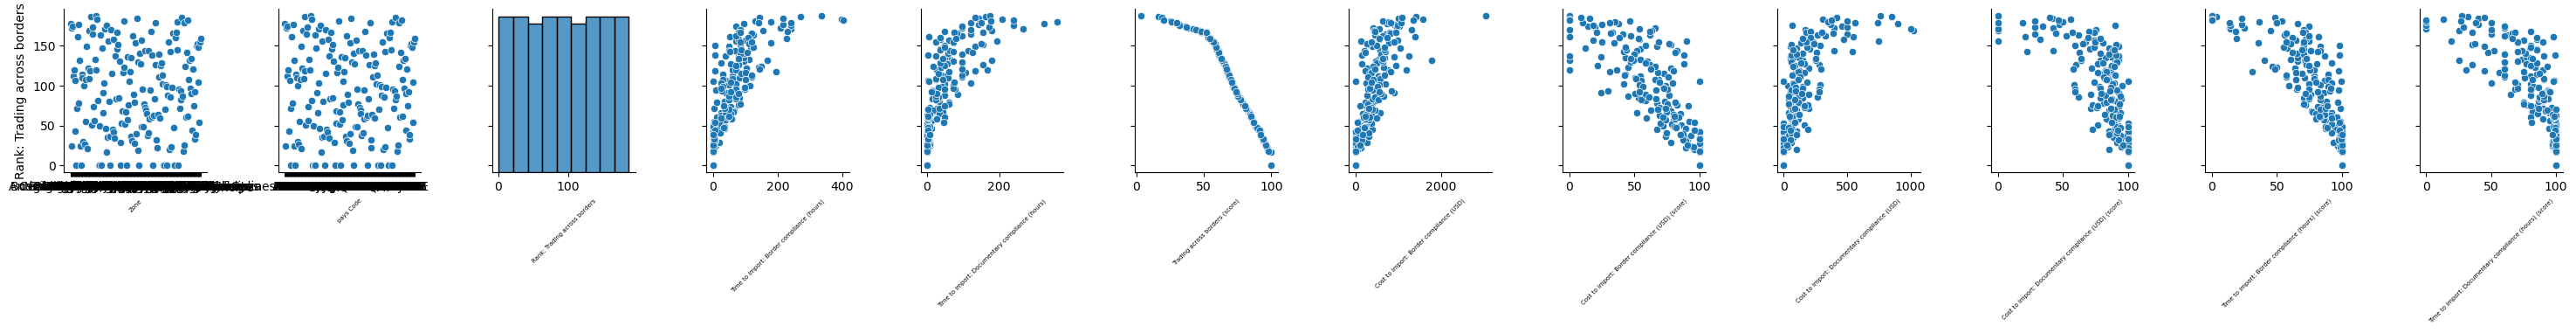

In [259]:
colonnes_df_WBG_ImportScore_2019 = df_WBG_ImportScore_2019.columns.tolist()

# Créer la matrice des graphiques bivariés
pairplot = sns.pairplot(
    df_WBG_ImportScore_2019,
    x_vars=colonnes_df_WBG_ImportScore_2019,
    y_vars=['Rank: Trading across borders'],    
)

for ax in pairplot.axes.flat:
    # Rotation et taille des étiquettes de l'axe X
    ax.set_xlabel(ax.get_xlabel(), fontsize=5, rotation=45)  # Changez fontsize et rotation ici
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)  # Changez fontsize et rotation ici

    
plt.show()

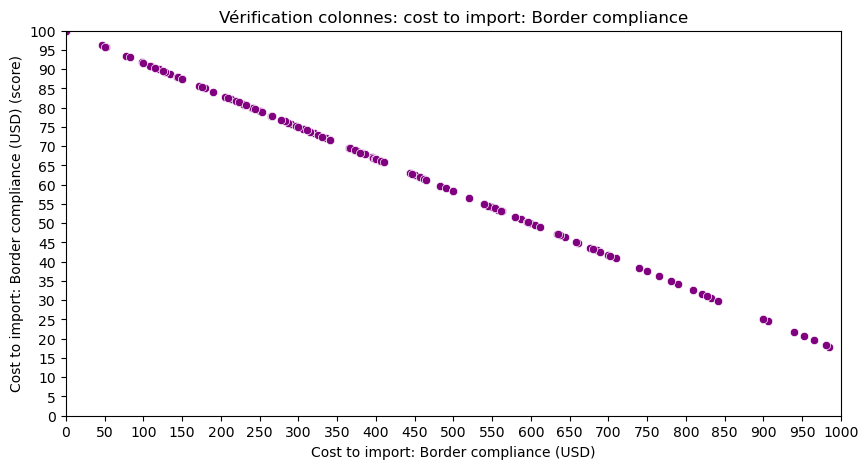

In [260]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_WBG_ImportScore_2019["Cost to import: Border compliance (USD)"], y=df_WBG_ImportScore_2019['Cost to import: Border compliance (USD) (score)'], color='purple')
plt.title("Vérification colonnes: cost to import: Border compliance")
plt.xlabel("Cost to import: Border compliance (USD)")
plt.ylabel('Cost to import: Border compliance (USD) (score)')

# Utiliser MultipleLocator pour définir un espacement automatique
ax = plt.gca()  # Obtenir l'objet "Axes"

ax.set_xlim(0, 1000)  # Plage des valeurs sur X
ax.set_ylim(0, 100)  # Plage des valeurs sur Y

ax.xaxis.set_major_locator(MultipleLocator(50))  # Un tick tous les 0.2 sur X
ax.yaxis.set_major_locator(MultipleLocator(5))  # Un tick tous les 5 sur Y
plt.show()

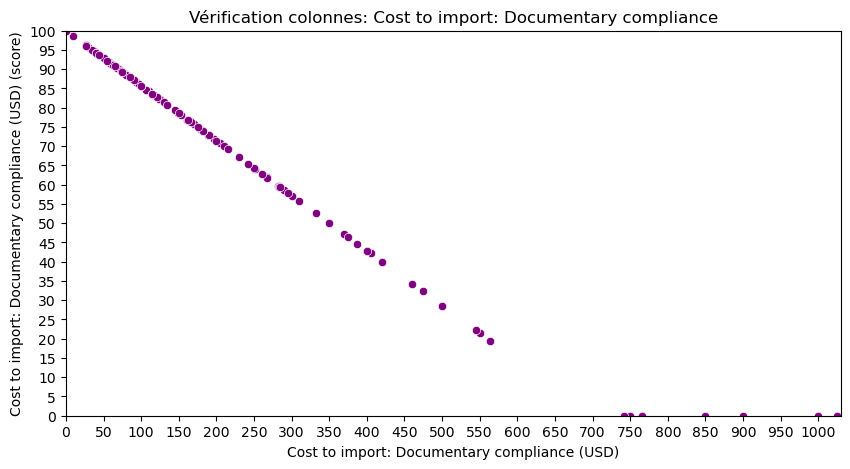

In [261]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_WBG_ImportScore_2019["Cost to import: Documentary compliance (USD)"], y=df_WBG_ImportScore_2019['Cost to import: Documentary compliance (USD) (score)'], color='purple')
plt.title("Vérification colonnes: Cost to import: Documentary compliance")
plt.xlabel("Cost to import: Documentary compliance (USD)")
plt.ylabel('Cost to import: Documentary compliance (USD) (score)')

# Utiliser MultipleLocator pour définir un espacement automatique
ax = plt.gca()  # Obtenir l'objet "Axes"

ax.set_xlim(0, 1030)  # Plage des valeurs sur X
ax.set_ylim(0, 100)  # Plage des valeurs sur Y

ax.xaxis.set_major_locator(MultipleLocator(50))  # Un tick tous les 0.2 sur X
ax.yaxis.set_major_locator(MultipleLocator(5))  # Un tick tous les 5 sur Y
plt.show()

In [262]:
df_WBG_ImportScore_2019[df_WBG_ImportScore_2019['Cost to import: Documentary compliance (USD) (score)']<10]

série Name,Zone,pays Code,Rank: Trading across borders,Time to import: Border compliance (hours),Time to import: Documentary compliance (hours),Trading across borders (score),Cost to import: Border compliance (USD),Cost to import: Border compliance (USD) (score),Cost to import: Documentary compliance (USD),Cost to import: Documentary compliance (USD) (score),Time to import: Border compliance (hours) (score),Time to import: Documentary compliance (hours) (score)
0,Afghanistan,AFG,177,96.00000,324.0000,30.63301,750.0000,37.50000,900.0000,0.0,65.94982,0.00000
26,Burundi,BDI,169,154.30000,180.0000,47.34275,443.5714,63.03571,1025.0000,0.0,45.05376,25.10460
29,Cameroon,CMR,186,271.00000,163.0000,15.98682,1406.8750,0.00000,849.0000,0.0,3.22581,32.21757
37,"Congo, Dem. Rep.",COD,187,336.00000,174.0000,3.45188,3039.0000,0.00000,765.0000,0.0,0.00000,27.61506
49,"Egypt, Arab Rep.",EGY,171,240.00000,265.0000,42.22742,553.6667,53.86111,1000.0000,0.0,14.33692,0.00000
55,Ethiopia,ETH,156,72.23077,194.0000,56.00201,120.0000,90.00000,750.0000,0.0,74.46926,19.24686
165,Syrian Arab Republic,SYR,178,141.33330,149.3333,29.83047,827.7778,31.01852,741.6667,0.0,49.70131,37.93584


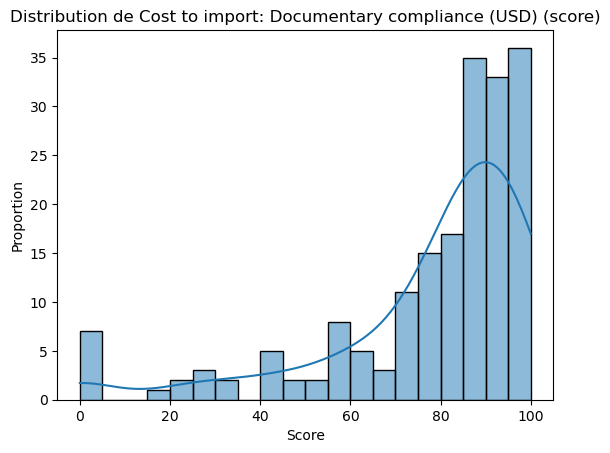

In [263]:
# Histogramme
sns.histplot(df_WBG_ImportScore_2019["Cost to import: Documentary compliance (USD) (score)"], bins=20, kde=True)
plt.title("Distribution de Cost to import: Documentary compliance (USD) (score)")
plt.xlabel("Score")
plt.ylabel("Proportion")
plt.show()

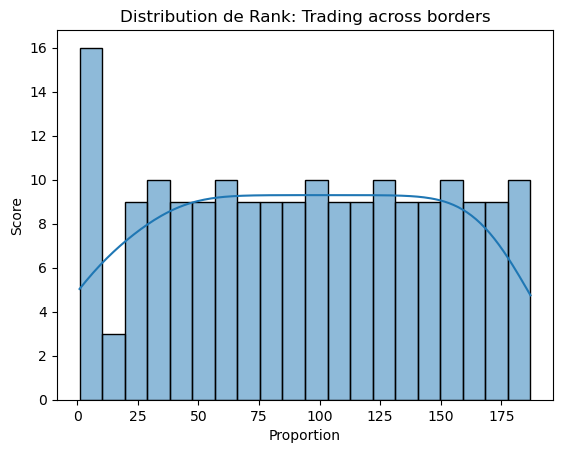

In [264]:
# Histogramme
sns.histplot(df_WBG_ImportScore_2019["Rank: Trading across borders"], bins=20, kde=True)
plt.title("Distribution de Rank: Trading across borders")
plt.xlabel("Proportion")
plt.ylabel("Score")
plt.show()

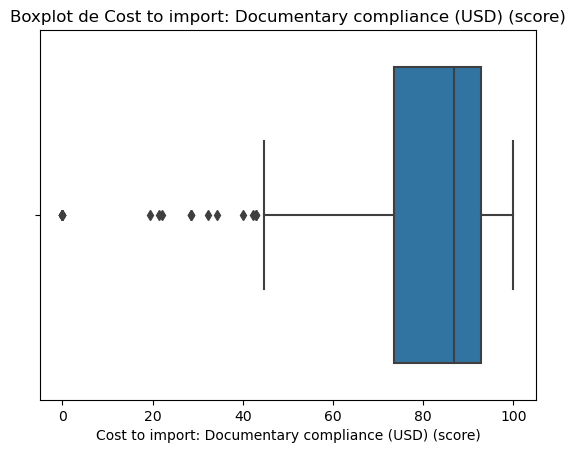

In [265]:
# Boxplot pour détecter les outliers
sns.boxplot(x=df_WBG_ImportScore_2019["Cost to import: Documentary compliance (USD) (score)"])
plt.title("Boxplot de Cost to import: Documentary compliance (USD) (score)")
plt.show()

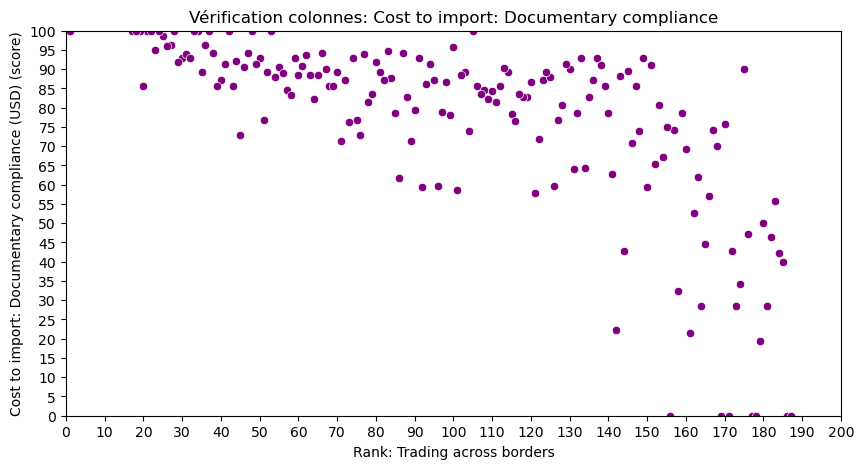

In [266]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_WBG_ImportScore_2019["Rank: Trading across borders"], y=df_WBG_ImportScore_2019['Cost to import: Documentary compliance (USD) (score)'], color='purple')
plt.title("Vérification colonnes: Cost to import: Documentary compliance")
plt.xlabel("Rank: Trading across borders")
plt.ylabel('Cost to import: Documentary compliance (USD) (score)')

# Utiliser MultipleLocator pour définir un espacement automatique
ax = plt.gca()  # Obtenir l'objet "Axes"

ax.set_xlim(0, 200)  # Plage des valeurs sur X
ax.set_ylim(0, 100)  # Plage des valeurs sur Y

ax.xaxis.set_major_locator(MultipleLocator(10))  # Un tick tous les 0.2 sur X
ax.yaxis.set_major_locator(MultipleLocator(5))  # Un tick tous les 5 sur Y
plt.show()

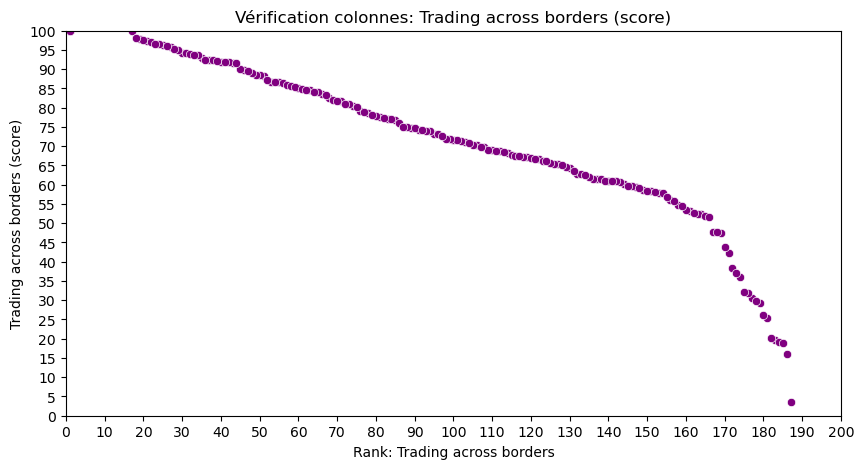

In [267]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_WBG_ImportScore_2019["Rank: Trading across borders"], y=df_WBG_ImportScore_2019['Trading across borders (score)'], color='purple')
plt.title("Vérification colonnes: Trading across borders (score)")
plt.xlabel("Rank: Trading across borders")
plt.ylabel('Trading across borders (score)')

# Utiliser MultipleLocator pour définir un espacement automatique
ax = plt.gca()  # Obtenir l'objet "Axes"

ax.set_xlim(0, 200)  # Plage des valeurs sur X
ax.set_ylim(0, 100)  # Plage des valeurs sur Y

ax.xaxis.set_major_locator(MultipleLocator(10))  # Un tick tous les 0.2 sur X
ax.yaxis.set_major_locator(MultipleLocator(5))  # Un tick tous les 5 sur Y
plt.show()

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">Etape 3.1 - Jonction du fichier df_transaction et df_customer</h3>
</div>

In [268]:
print(df_WBG_ImportScore_2019.shape)
print(df_WBG_2022.shape)

(187, 12)
(163, 12)


In [269]:
#Merge les datasets sur la colonne pays Code
df_merge_WBG = pd.merge(df_WBG_2022, df_WBG_ImportScore_2019, on='pays Code', how='inner', suffixes=('_ds2022', '_ds2019'))

#Mettre à jour la colonne 'col2' de dataset1 avec la colonne 'col2_ds2' si elle existe
#dataset1['col2'] = merged_df['col2_ds2'].combine_first(dataset1['col2'])

print(df_merge_WBG)
print(df_merge_WBG.shape)

série Name     Zone_ds2022 pays Code  Croissance du PIB (% annuel)  \
0              Afghanistan       AFG                     -6.240172   
1           Afrique du Sud       ZAF                      1.910406   
2                  Albanie       ALB                      4.856402   
3                  Algérie       DZA                      3.600000   
4                Allemagne       DEU                      1.806209   
..                     ...       ...                           ...   
154               Équateur       ECU                      6.186139   
155             États-Unis       USA                      1.935496   
156               Éthiopie       ETH                      5.321176   
157          Îles Marshall       MHL                     -0.675526   
158           Îles Salomon       SLB                      2.402481   

série Name  Croissance du PIB par habitant (% annuel)  \
0                                           -8.586652   
1                                            

In [270]:
df_merge_WBG = df_merge_WBG.set_index('Zone_ds2022')

In [271]:
df_merge_WBG

série Name,pays Code,Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Facteur de conversion PPA, PIB (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",...,Rank: Trading across borders,Time to import: Border compliance (hours),Time to import: Documentary compliance (hours),Trading across borders (score),Cost to import: Border compliance (USD),Cost to import: Border compliance (USD) (score),Cost to import: Documentary compliance (USD),Cost to import: Documentary compliance (USD) (score),Time to import: Border compliance (hours) (score),Time to import: Documentary compliance (hours) (score)
Zone_ds2022,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,-6.240172,-8.586652,14.910282,54.505427,9.406239,1.450216e+10,352.603733,2092.879952,8.607758e+10,...,177,96.00000,324.0,30.63301,750.0000,37.50000,900.0000,0.00000,65.94982,0.00000
Afrique du Sud,ZAF,1.910406,1.056875,7.218918,31.522290,4.759484,4.052709e+11,6766.481254,15330.769274,9.182193e+11,...,145,87.00000,36.0,59.64271,676.0000,43.66667,73.0000,89.57143,69.17563,85.35565
Albanie,ALB,4.856402,6.139017,39.492906,47.754258,9.866013,1.891638e+10,6810.114041,19492.783099,5.414489e+10,...,25,10.00000,8.0,96.29094,77.3000,93.55833,10.0000,98.57143,96.77419,97.07113
Algérie,DZA,3.600000,1.926701,44.501117,20.394351,22.886075,2.255603e+11,5023.252932,16028.287109,7.197218e+11,...,172,209.57140,96.0,38.42879,408.7778,65.93519,399.7778,42.88889,25.24322,60.25105
Allemagne,DEU,1.806209,1.074952,0.694484,48.956410,5.268325,4.082469e+12,48717.991140,66616.022245,5.582288e+12,...,42,0.00000,0.5,91.77378,0.0000,100.00000,0.0000,100.00000,100.00000,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,ECU,6.186139,4.987111,0.428427,30.835066,2.195711,1.165861e+11,6476.644575,15117.270630,2.721260e+11,...,103,24.00000,120.0,71.15372,250.0000,79.16667,75.0000,89.28571,91.75627,50.20921
États-Unis,USA,1.935496,1.561598,1.000000,15.406108,7.041026,2.574411e+13,77246.673883,77246.673883,2.574411e+13,...,39,1.50000,7.5,92.01404,175.0000,85.41667,100.0000,85.71429,99.82079,97.28033
Éthiopie,ETH,5.321176,2.677562,17.274989,18.351539,34.667353,1.267727e+11,1027.498631,2888.736492,3.564121e+11,...,156,72.23077,194.0,56.00201,120.0000,90.00000,750.0000,0.00000,74.46926,19.24686


In [272]:
df_merge_WBG.drop(columns=["pays Code", "Zone_ds2019"], inplace=True)

In [273]:
pd.set_option('display.max_rows', 290) 

In [274]:
df_tauxDeChange_2022.shape

(205, 2)

In [275]:
# Trouver les index communs
index_communs = df_merge_WBG.index.intersection(df_tauxDeChange_2022.index)
print("Index communs :", index_communs)

Index communs : Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Australie',
       ...
       'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu', 'Viet Nam', 'Zambie',
       'Zimbabwe', 'Équateur', 'Éthiopie', 'Îles Salomon'],
      dtype='object', length=134)


In [276]:
# Index présents dans df_merge_WBG mais pas dans df_tauxDeChange_2022
index_uniques_df_merge_WBG = df_merge_WBG.index.difference(df_tauxDeChange_2022.index)
print("Index présents uniquement dans df_WBG_2022 :", index_uniques_df_merge_WBG)

Index présents uniquement dans df_WBG_2022 : Index(['Afghanistan', 'Bolivie', 'Chine', 'Chine, RAS de Hong Kong',
       'Cisjordanie et Gaza', 'Congo, République du',
       'Congo, République démocratique du', 'Corée, République de', 'Guinée',
       'Iran, République islamique d', 'Kosovo',
       'Micronésie, États fédérés de', 'Moldova', 'Pays-Bas', 'Porto Rico',
       'Royaume-Uni', 'République kirghize', 'République slovaque',
       'République tchèque', 'Somalie', 'Sri Lanka', 'Tanzanie',
       'Égypte, République arabe d', 'États-Unis', 'Îles Marshall'],
      dtype='object')


In [277]:
# Index présents dans df_tauxDeChange_2022 mais pas dans df_merge_WBG
index_uniques_df_FAOSTAT = df_tauxDeChange_2022.index.difference(df_merge_WBG.index)
print("Index présents uniquement dans df_FAOSTAT :", index_uniques_df_FAOSTAT)

Index présents uniquement dans df_FAOSTAT : Index(['Andorre', 'Anguilla', 'Aruba', 'Bahreïn', 'Bermudes',
       'Bolivie (État plurinational de)', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Congo', 'Curaçao', 'Dominique', 'Gibraltar',
       'Grenade', 'Guadeloupe', 'Guernesey', 'Guyana', 'Guyane française',
       'Iran (République islamique d')', 'Iraq', 'Jamaïque', 'Jersey',
       'Jordanie', 'Kirghizistan', 'Koweït', 'Libéria', 'Maldives',
       'Martinique', 'Mayotte', 'Micronésie (États fédérés de)', 'Monaco',
       'Montserrat', 'Myanmar', 'Nauru', 'Nigéria', 'Nouvelle-Calédonie',
       'Oman', 'Papouasie-Nouvelle-Guinée', 'Pays-Bas (Royaume des)',
       'Polynésie française',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République arabe syrienne', 'République de Corée',
       'République de Moldova', 'République démocratique populaire lao',
       'Réunion', 'Saint-Kitts-

In [278]:
df_merge_WBG = df_merge_WBG.rename(index={'Chine': 'Chine, continentale', 
                                        'Chine, RAS de Hong Kong': 'Chine - RAS de Hong-Kong',
                                       'Bolivie': 'Bolivie (État plurinational de)',
                                       'Cisjordanie et Gaza': 'Palestine',
                                       'Région administrative spéciale de Macao, Chine': 'Chine - RAS de Macao',
                                       'Congo, République du': 'Congo',
                                       'Congo, République démocratique du': 'République démocratique du Congo',
                                       'Corée, République de': 'République de Corée',
                                       'Iran, République islamique d': 'Iran (République islamique d\')',
                                       'Micronésie, États fédérés de': 'Micronésie (États fédérés de)',
                                       'Moldova':'République de Moldova',
                                       'Pays-Bas':'Pays-Bas (Royaume des)',
                                       'Royaume-Uni':'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord',
                                       'République kirghize':'Kirghizistan',
                                       'République slovaque':'Slovaquie',
                                        'République tchèque':'Tchéquie',
                                        'Tanzanie':'République-Unie de Tanzanie',
                                        'Égypte, République arabe d':'Égypte',
                                        'États-Unis':'États-Unis d\'Amérique'
                                       })


In [279]:
# Index présents dans df_merge_WBG mais pas dans df_tauxDeChange_2022
index_uniques_df_merge_WBG = df_merge_WBG.index.difference(df_tauxDeChange_2022.index)
print("Index présents uniquement dans df_WBG_2022 :", index_uniques_df_merge_WBG)

Index présents uniquement dans df_WBG_2022 : Index(['Afghanistan', 'Guinée', 'Kosovo', 'Palestine', 'Porto Rico',
       'République démocratique du Congo', 'République-Unie de Tanzanie',
       'Somalie', 'Sri Lanka', 'Îles Marshall'],
      dtype='object')


In [280]:
# Index présents dans df_tauxDeChange_2022 mais pas dans df_merge_WBG
index_uniques_df_FAOSTAT = df_tauxDeChange_2022.index.difference(df_merge_WBG.index)
print("Index présents uniquement dans df_FAOSTAT :", index_uniques_df_FAOSTAT)

Index présents uniquement dans df_FAOSTAT : Index(['Andorre', 'Anguilla', 'Aruba', 'Bahreïn', 'Bermudes',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Curaçao',
       'Dominique', 'Gibraltar', 'Grenade', 'Guadeloupe', 'Guernesey',
       'Guyana', 'Guyane française', 'Iraq', 'Jamaïque', 'Jersey', 'Jordanie',
       'Koweït', 'Libéria', 'Maldives', 'Martinique', 'Mayotte', 'Monaco',
       'Montserrat', 'Myanmar', 'Nauru', 'Nigéria', 'Nouvelle-Calédonie',
       'Oman', 'Papouasie-Nouvelle-Guinée', 'Polynésie française',
       'République arabe syrienne', 'République démocratique populaire lao',
       'Réunion', 'Saint-Kitts-et-Nevis', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie',
       'Sao Tomé-et-Principe', 'Sint Maarten (partie néerlandaise)',
       'Soudan du Sud', 'Suriname', 'Terres australes françaises', 'Tonga',
       'Trinité-et-Tobago', 'Yémen'

In [281]:
df_tauxDeChange_2022

Élément,Année,Unités de monnaie locale par USD
Zone,,
Afrique du Sud,2022,16.355853
Albanie,2022,113.041667
Algérie,2022,141.994975
Allemagne,2022,0.950916
Andorre,2022,0.950916
Angola,2022,460.567512
Anguilla,2022,2.700000
Antigua-et-Barbuda,2022,2.700000
Arabie saoudite,2022,3.750000


In [282]:
df_prixProduction_2022.shape

#df_dataExport = pd.merge(df_dataExport, df_prixProduction_2022, left_index=True, right_index=True, how='inner')

(36, 1)

In [283]:
df_merge_WBG.shape

(159, 20)

In [284]:
# Jointure interne sur les index
df_dataExport = pd.merge(df_merge_WBG, df_tauxDeChange_2022, left_index=True, right_index=True, how='inner')

In [285]:
df_dataExport.shape

(149, 22)

In [286]:
df_dataExport = pd.merge(df_dataExport, df_agricultureBIO_2022, left_index=True, right_index=True, how='inner')

In [287]:
df_dataExport.shape

(124, 25)

In [288]:
df_dataExport = pd.merge(df_dataExport, df_importExport_2022, left_index=True, right_index=True, how='inner')

In [289]:
df_dataExport.shape

(120, 27)

In [290]:
df_dataExport = pd.merge(df_dataExport, df_dispoAlimentaire_2022, left_index=True, right_index=True, how='inner')

In [291]:
df_dataExport.shape

(119, 32)

In [292]:
df_dataExport = pd.merge(df_dataExport, df_population_2021, left_index=True, right_index=True, how='inner')

In [293]:
df_dataExport.shape

(119, 33)

In [294]:
df_dataExport.drop(columns=["Année"], inplace=True)

In [295]:
df_dataExport

,Croissance du PIB (% annuel),Croissance du PIB par habitant (% annuel),"Facteur de conversion PPA, PIB (unités de devises locales par $ international)",Importations de biens et de services (% du PIB),"Inflation, déflateur du PIB (% annuel)",PIB ($ US courants),PIB par habitant ($ US courants),"PIB par habitant, ($ PPA internationaux courants)","PIB, ($ PPA internationaux courants)",Political Stability and Absence of Violence/Terrorism: Estimate,...,Terres agricoles,Pourcentage terre agricoles BIO,Importations - Quantité (tonnes),Importations - Valeur (US$),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (tonnes),Production,Stocks d'ouverture,Variation de stock,Population
Afrique du Sud,1.910406,1.056875,7.218918,31.522290,4.759484,4.052709e+11,6766.481254,15330.769274,9.182193e+11,-0.681386,...,96341.0000,0.046469,290742.62,2.191470e+08,148.09,2350000.00,1951000.00,329905.08,-158756.90,5.939226e+07
Albanie,4.856402,6.139017,39.492906,47.754258,9.866013,1.891638e+10,6810.114041,19492.783099,5.414489e+10,0.106261,...,1135.6000,0.061641,43124.46,7.338400e+07,78.96,59460.03,16335.57,7762.60,0.00,2.854710e+06
Allemagne,1.806209,1.074952,0.694484,48.956410,5.268325,4.082469e+12,48717.991140,66616.022245,5.582288e+12,0.628492,...,16595.0000,9.674601,494001.70,1.524674e+09,41.64,919780.73,1076000.00,1324037.70,166374.59,8.340855e+07
Arabie saoudite,7.485984,6.132627,2.104629,23.292391,17.983946,1.108571e+12,30447.882317,54251.637904,1.975238e+12,-0.355806,...,173637.4170,0.013427,513695.66,1.433343e+09,168.52,1625625.05,1130000.00,0.00,0.00,3.595040e+07
Argentine,4.956370,3.989131,61.403181,15.350952,69.471240,6.311334e+11,13650.604629,29037.489122,1.342543e+12,-0.098594,...,118848.3770,3.029070,10218.32,2.121600e+07,177.88,2144913.81,2319000.00,311532.00,0.00,4.527678e+07
Arménie,12.600000,13.025419,149.549509,50.992845,7.985702,1.951347e+10,7018.051504,20445.098881,5.684696e+10,-0.740756,...,1652.8000,0.040779,37595.23,5.677000e+07,66.64,49091.19,11900.00,6760.31,0.00,2.790974e+06
Australie,4.268946,2.950326,1.372115,19.709620,7.123076,1.692957e+12,65077.676669,65365.948511,1.700456e+12,0.983716,...,363519.0000,9.817313,83.08,2.790000e+05,177.82,1233293.19,1361905.00,235000.51,60119.85,2.592109e+07
Autriche,4.806430,3.808956,0.696870,61.602264,5.297284,4.709419e+11,52084.681195,70975.720635,6.417519e+11,0.648710,...,2597.4477,27.172828,57009.49,2.214700e+08,47.96,113598.73,128404.00,39844.56,1324.88,8.922082e+06
Azerbaïdjan,4.714802,4.673440,0.586239,26.995425,37.270561,7.880747e+10,7770.594223,22533.494057,2.285292e+11,-0.922807,...,4780.5000,0.796569,32384.83,5.146900e+07,58.67,161017.03,130108.00,0.00,0.00,1.031299e+07
Bahamas,10.782013,10.220516,0.952545,43.747145,4.301046,1.313640e+10,32041.250390,33637.504798,1.379084e+10,0.881239,...,13.0000,0.376923,17570.61,4.998200e+07,206.21,22399.37,6061.99,54494.32,0.00,4.079060e+05


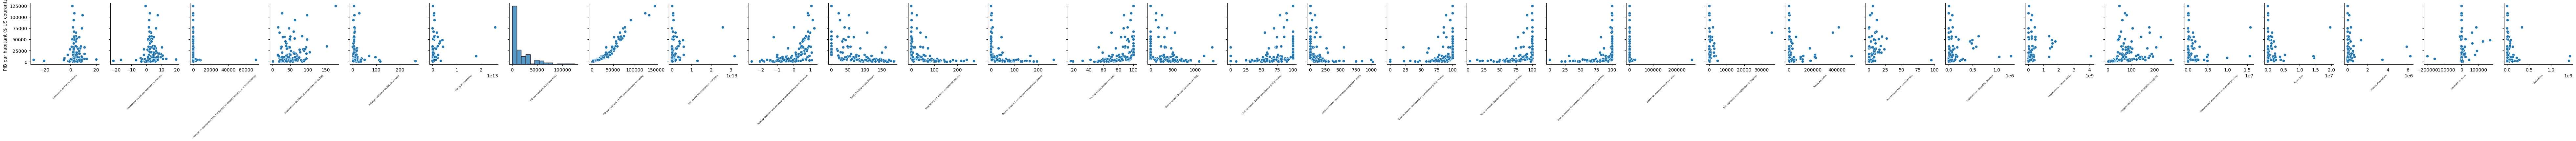

In [296]:
colonnes_df_dataExport = df_dataExport.columns.tolist()

# Créer la matrice des graphiques bivariés
pairplot = sns.pairplot(
    df_dataExport,
    x_vars=colonnes_df_dataExport,
    y_vars=['PIB par habitant ($ US courants)'],    
)

for ax in pairplot.axes.flat:
    # Rotation et taille des étiquettes de l'axe X
    ax.set_xlabel(ax.get_xlabel(), fontsize=5, rotation=45)  # Changez fontsize et rotation ici
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)  # Changez fontsize et rotation ici

    
plt.show()

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Exportation des données</h2>
</div>

In [297]:
#Chemin où le fichier CSV sera enregistré
chemin_fichier = 'C:/Users/kevin/Documents/Openclassroom/Projet Openclassroom/Projet 11/Nouvelle_Données/data_export_notebook.csv'

#Enregistrement du DataFrame en tant que fichier CSV
df_dataExport.to_csv(chemin_fichier, index=True, encoding='iso-8859-1') 

#Confirmation d'enregistrement
print(f"Le fichier CSV a été enregistré avec succès à l'emplacement : {chemin_fichier}")

Le fichier CSV a été enregistré avec succès à l'emplacement : C:/Users/kevin/Documents/Openclassroom/Projet Openclassroom/Projet 11/Nouvelle_Données/data_export_notebook.csv
